# Employee Peformance Score Project

# Data Understanding

In [ ]:
# import modul

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso
from datetime import date
from scipy.stats import ttest_ind
from scipy.stats import skew,skewtest,spearmanr,pearsonr,normaltest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import RobustScaler,OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve,make_scorer,accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
# Load the dataset

data = pd.read_csv('HRDataset_v14.csv')
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


## Data Description

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

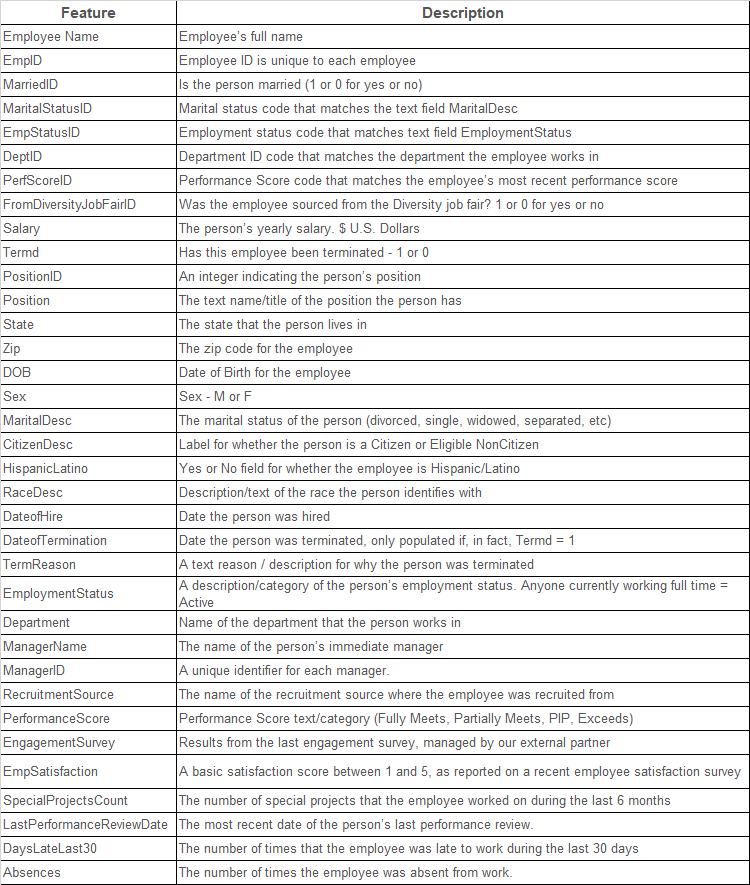

In [ ]:
# Melihat duplikat dalam data

data.duplicated().sum()

0

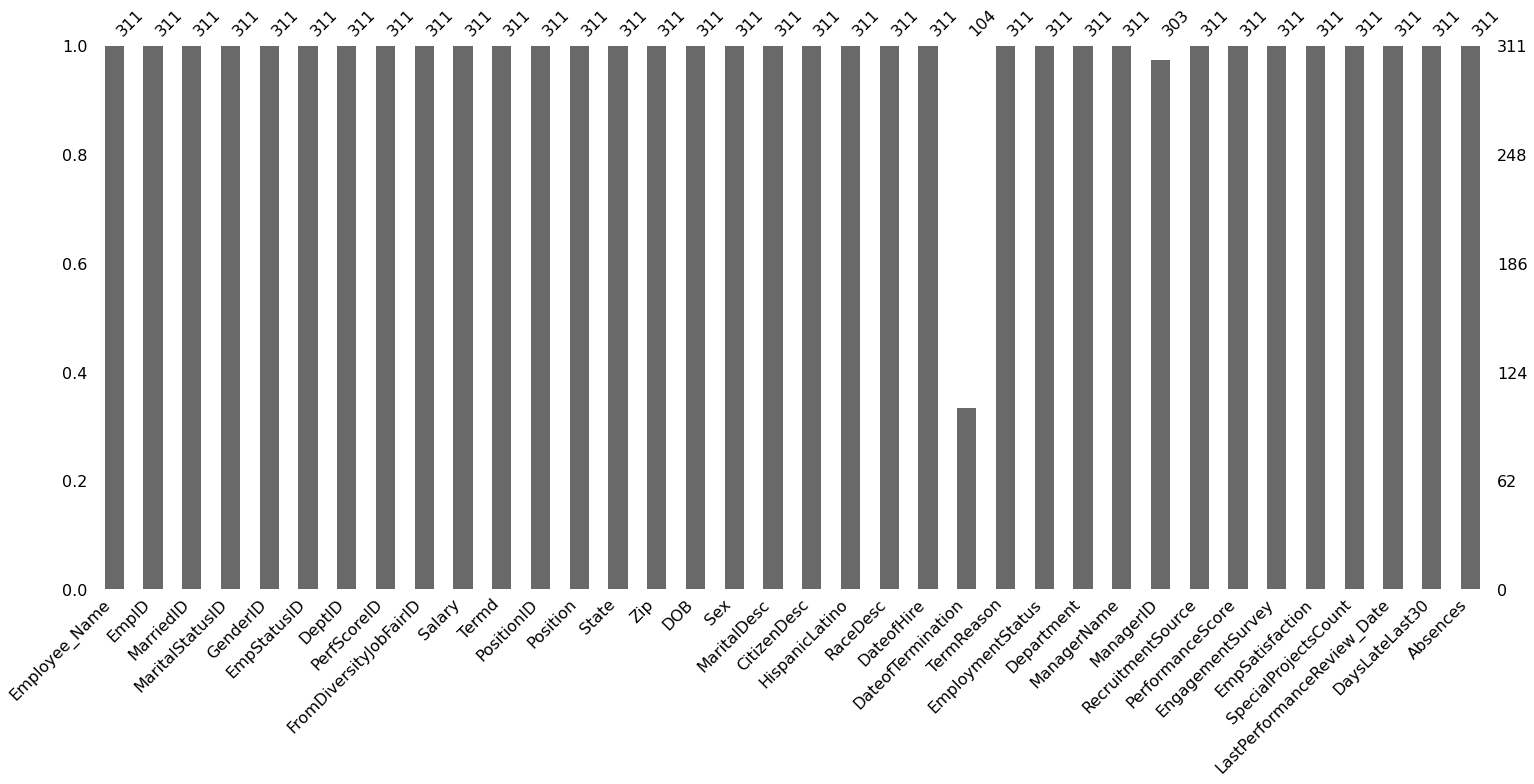

In [ ]:
# Melihat jumlah missing value

mnso.bar(data)

In [ ]:
# Melihat jumlah persentase missing value

data.isna().sum()/len(data)*100

Employee_Name                  0.000000
EmpID                          0.000000
MarriedID                      0.000000
MaritalStatusID                0.000000
GenderID                       0.000000
EmpStatusID                    0.000000
DeptID                         0.000000
PerfScoreID                    0.000000
FromDiversityJobFairID         0.000000
Salary                         0.000000
Termd                          0.000000
PositionID                     0.000000
Position                       0.000000
State                          0.000000
Zip                            0.000000
DOB                            0.000000
Sex                            0.000000
MaritalDesc                    0.000000
CitizenDesc                    0.000000
HispanicLatino                 0.000000
RaceDesc                       0.000000
DateofHire                     0.000000
DateofTermination             66.559486
TermReason                     0.000000
EmploymentStatus               0.000000


In [ ]:
# Mengubah format tanggal menjadi datetime

data['DOB'] = pd.to_datetime(data['DOB'])
data['DateofHire'] = pd.to_datetime(data['DateofHire'])
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])
data['LastPerformanceReview_Date'] = pd.to_datetime(data['LastPerformanceReview_Date'])
data['HispanicLatino'] = data['HispanicLatino'].str.lower()

In [ ]:
# Memisahkan data kategorik dan data numerik

data_num = data.select_dtypes('number')
data_cat = data.select_dtypes('object')

In [ ]:
# Menampilkan statistika deskriptif secara keseluruhan pada data numerik

data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


In [ ]:
# Menampilkan statistika deskriptif secara keseluruhan pada data kategorik

data_cat.describe().T

,count,unique,top,freq
Employee_Name,311,311,"Adinolfi, Wilson K",1
Position,311,32,Production Technician I,137
State,311,28,MA,276
Sex,311,2,F,176
MaritalDesc,311,5,Single,137
CitizenDesc,311,3,US Citizen,295
HispanicLatino,311,2,no,283
RaceDesc,311,6,White,187
TermReason,311,18,N/A-StillEmployed,207
EmploymentStatus,311,3,Active,207


## Exploratory Data Analysis

In [ ]:
# Mengeluarkan variabel yang tidak penting

df = data.drop(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
                'EmpStatusID','DeptID', 'PerfScoreID','PositionID', 'Zip', 
                'ManagerID', 'Employee_Name','ManagerName'],axis=1)
df

,FromDiversityJobFairID,Salary,Termd,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0,62506,0,Production Technician I,MA,1983-07-10,M,Single,US Citizen,no,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,0,104437,1,Sr. DBA,MA,1975-05-05,M,Married,US Citizen,no,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,0,64955,1,Production Technician II,MA,1988-09-19,F,Married,US Citizen,no,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,0,64991,0,Production Technician I,MA,1988-09-27,F,Married,US Citizen,no,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,0,50825,1,Production Technician I,MA,1989-09-08,F,Divorced,US Citizen,no,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,65893,0,Production Technician II,MA,1985-05-11,M,Single,US Citizen,no,White,2014-07-07,NaT,N/A-StillEmployed,Active,Production,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,0,13
307,0,48513,1,Production Technician I,MA,1982-05-04,F,Single,US Citizen,no,Asian,2008-09-02,2015-09-29,Another position,Voluntarily Terminated,Production,Google Search,PIP,3.20,2,0,2015-09-02,5,4
308,0,220450,0,CIO,MA,1979-08-30,F,Single,US Citizen,no,White,2010-04-10,NaT,N/A-StillEmployed,Active,IT/IS,Employee Referral,Exceeds,4.60,5,6,2019-02-21,0,16
309,0,89292,0,Data Analyst,MA,1979-02-24,F,Single,US Citizen,no,White,2015-03-30,NaT,N/A-StillEmployed,Active,IT/IS,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,0,11


In [ ]:
# Memisahkan data kategorik dan data numerik

df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')


Iterasi ke- 1
Kolom :  FromDiversityJobFairID


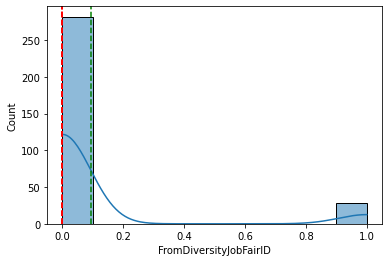

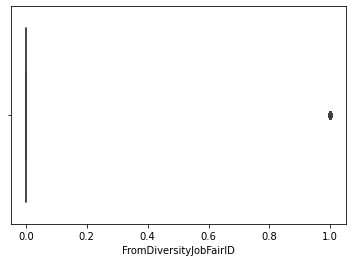


Skew Value :  2.7976731064345435
Skew Test Value :  SkewtestResult(statistic=11.905796309485675, pvalue=1.1040430049991768e-32)
count    311.000000
mean       0.093248
std        0.291248
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FromDiversityJobFairID, dtype: float64

nilai max di luar outlier = 0
nilai min di luar outlier = 0
jumlah outlier:29
outlier:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Iterasi ke- 2
Kolom :  Salary


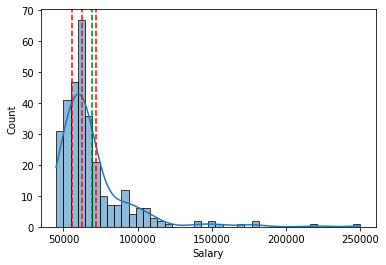

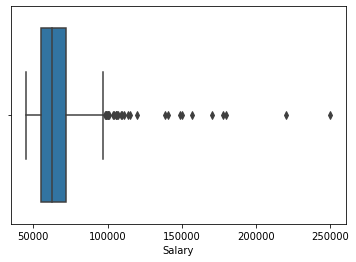


Skew Value :  3.290213187177172
Skew Test Value :  SkewtestResult(statistic=12.878605572280385, pvalue=5.939904384347012e-38)
count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

nilai max di luar outlier = 96820
nilai min di luar outlier = 45046
jumlah outlier:29
outlier:
[104437, 110000, 103613, 106367, 100031, 110929, 170500, 101199, 138888, 99280, 178000, 99351, 114800, 99020, 97999, 180000, 105700, 250000, 105688, 157000, 108987, 120000, 150290, 140920, 148999, 100416, 113999, 107226, 220450]


Iterasi ke- 3
Kolom :  Termd


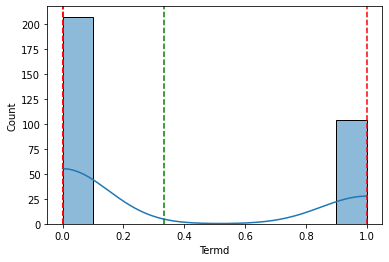

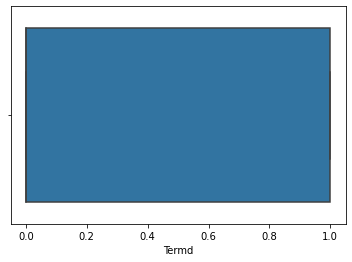


Skew Value :  0.7019972039273472
Skew Test Value :  SkewtestResult(statistic=4.7081129691224675, pvalue=2.5002053494223514e-06)
count    311.000000
mean       0.334405
std        0.472542
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Termd, dtype: float64

nilai max di luar outlier = 1
nilai min di luar outlier = 0
jumlah outlier:0
outlier:
[]


Iterasi ke- 4
Kolom :  EngagementSurvey


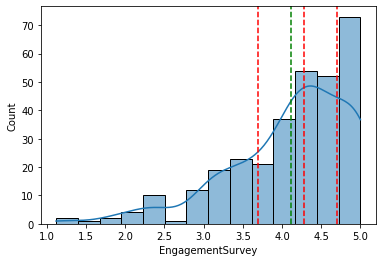

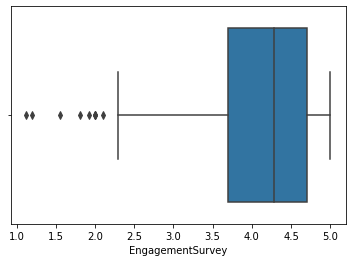


Skew Value :  -1.1115847398476095
Skew Test Value :  SkewtestResult(statistic=-6.7709587476222515, pvalue=1.2793175174323652e-11)
count    311.000000
mean       4.110000
std        0.789938
min        1.120000
25%        3.690000
50%        4.280000
75%        4.700000
max        5.000000
Name: EngagementSurvey, dtype: float64

nilai max di luar outlier = 5.0
nilai min di luar outlier = 2.3
jumlah outlier:9
outlier:
[2.0, 2.0, 1.93, 1.12, 2.1, 1.56, 1.2, 2.0, 1.81]


Iterasi ke- 5
Kolom :  EmpSatisfaction


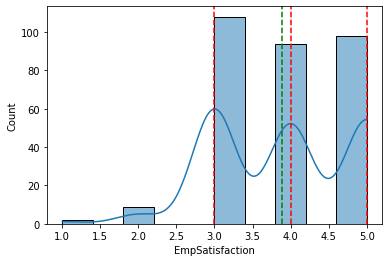

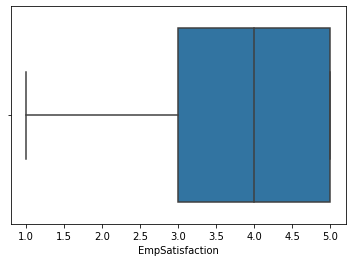


Skew Value :  -0.22153385654176136
Skew Test Value :  SkewtestResult(statistic=-1.6132574649221838, pvalue=0.10668858343329096)
count    311.000000
mean       3.890675
std        0.909241
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: EmpSatisfaction, dtype: float64

nilai max di luar outlier = 5
nilai min di luar outlier = 1
jumlah outlier:0
outlier:
[]


Iterasi ke- 6
Kolom :  SpecialProjectsCount


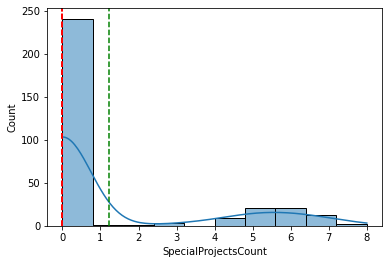

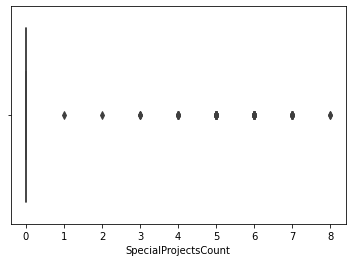


Skew Value :  1.531836752422989
Skew Test Value :  SkewtestResult(statistic=8.444678956849739, pvalue=3.0488217405623304e-17)
count    311.000000
mean       1.218650
std        2.349421
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: SpecialProjectsCount, dtype: float64

nilai max di luar outlier = 0
nilai min di luar outlier = 0
jumlah outlier:70
outlier:
[6, 4, 6, 5, 5, 7, 3, 6, 5, 6, 6, 7, 6, 6, 4, 8, 3, 5, 7, 6, 5, 4, 6, 5, 2, 5, 4, 7, 5, 5, 6, 4, 5, 6, 4, 7, 5, 4, 6, 6, 6, 3, 5, 7, 6, 6, 7, 5, 7, 6, 6, 5, 6, 7, 5, 4, 5, 5, 1, 5, 5, 6, 5, 4, 7, 7, 7, 8, 6, 5]


Iterasi ke- 7
Kolom :  DaysLateLast30


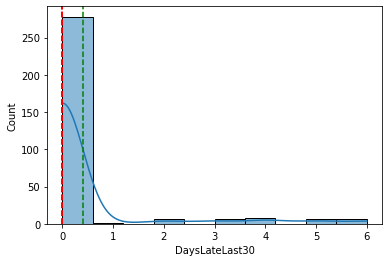

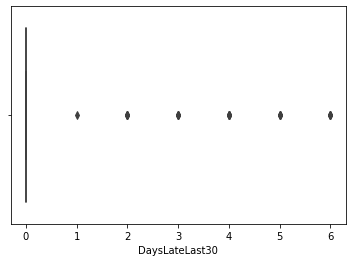


Skew Value :  3.1282858223616987
Skew Test Value :  SkewtestResult(statistic=12.574658135733888, pvalue=2.910566175298191e-36)
count    311.000000
mean       0.414791
std        1.294519
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: DaysLateLast30, dtype: float64

nilai max di luar outlier = 0
nilai min di luar outlier = 0
jumlah outlier:33
outlier:
[2, 1, 5, 3, 2, 6, 4, 2, 2, 5, 5, 4, 6, 3, 4, 2, 3, 3, 3, 6, 4, 6, 4, 4, 5, 4, 5, 2, 6, 3, 4, 6, 5]


Iterasi ke- 8
Kolom :  Absences


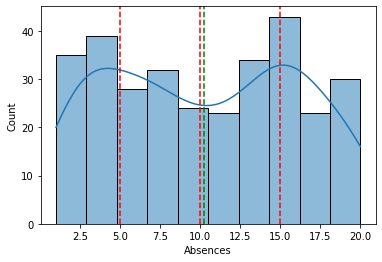

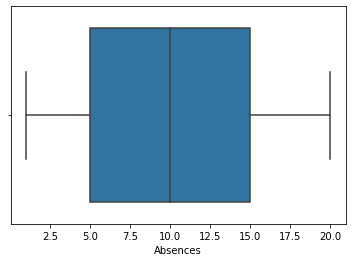


Skew Value :  0.029142028352946513
Skew Test Value :  SkewtestResult(statistic=0.21455691801258298, pvalue=0.8301127860596812)
count    311.000000
mean      10.237942
std        5.852596
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Absences, dtype: float64

nilai max di luar outlier = 20
nilai min di luar outlier = 1
jumlah outlier:0
outlier:
[]



In [ ]:
# EDA for univariate analysis

# numeric data list
list_kontinu = list(df_num.columns)

# loop
iter = 1
for i in list_kontinu:
  print()
  print('Iterasi ke-',iter)
  print('Kolom : ',i)
  sns.histplot(df_num[i],kde=True)
  plt.axvline(np.mean(df_num[i]),c='green',linestyle='--')
  plt.axvline(np.percentile(df_num[i],25),c='red',linestyle='--')
  plt.axvline(np.percentile(df_num[i],50),c='red',linestyle='--')
  plt.axvline(np.percentile(df_num[i],75),c='red',linestyle='--')
  plt.show()
  sns.boxplot(data=df_num, x=df_num[i])
  plt.show()

  print()
  print('Skew Value : ',skew(df_num[i]))
  print('Skew Test Value : ',skewtest(df_num[i]))
  print(df_num[i].describe())
  
  print()
  Q1 = np.percentile(df_num[i],25)
  Q2 = np.percentile(df_num[i],50)
  Q3 = np.percentile(df_num[i],75)
  IQR = Q3-Q1

  upper_f = Q3 + 1.5 * IQR
  lower_f = Q1 - 1.5 * IQR

  upper_w = np.max(df_num[df_num[i] <= upper_f][i])
  lower_w = np.min(df_num[df_num[i] >= lower_f][i])
  outlier = list(df_num[(df_num[i] < lower_w) | (df_num[i] > upper_f)][i])

  print('nilai max di luar outlier = {}'.format(upper_w))
  print('nilai min di luar outlier = {}'.format(lower_w))
  print('jumlah outlier:{}'.format(len(outlier)))
  print('outlier:')
  print(outlier)
  iter+=1
  print()


Iterasi ke- 1
Kolom :  Position


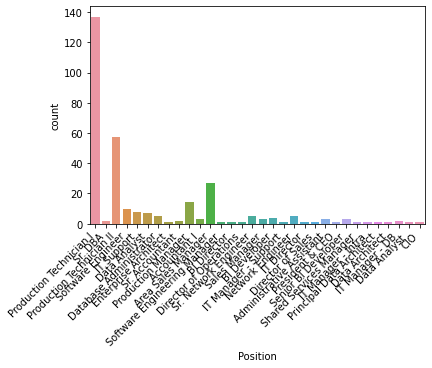

Jumlah kategori unik : 32
Jumlah nilai kategori unik : ['Production Technician I', 'Sr. DBA', 'Production Technician II', 'Software Engineer', 'IT Support', 'Data Analyst', 'Database Administrator', 'Enterprise Architect', 'Sr. Accountant', 'Production Manager', 'Accountant I', 'Area Sales Manager', 'Software Engineering Manager', 'BI Director', 'Director of Operations', 'Sr. Network Engineer', 'Sales Manager', 'BI Developer', 'IT Manager - Support', 'Network Engineer', 'IT Director', 'Director of Sales', 'Administrative Assistant', 'President & CEO', 'Senior BI Developer', 'Shared Services Manager', 'IT Manager - Infra', 'Principal Data Architect', 'Data Architect', 'IT Manager - DB', 'Data Analyst ', 'CIO']
Jumlah total nilai kategori unik :
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                  

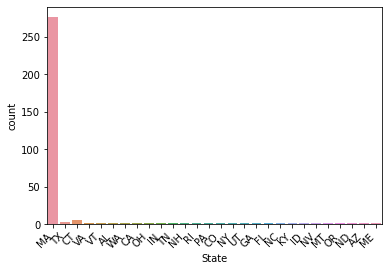

Jumlah kategori unik : 28
Jumlah nilai kategori unik : ['MA', 'TX', 'CT', 'VA', 'VT', 'AL', 'WA', 'CA', 'OH', 'IN', 'TN', 'NH', 'RI', 'PA', 'CO', 'NY', 'UT', 'GA', 'FL', 'NC', 'KY', 'ID', 'NV', 'MT', 'OR', 'ND', 'AZ', 'ME']
Jumlah total nilai kategori unik :
MA    276
CT      6
TX      3
VT      2
UT      1
AZ      1
ND      1
OR      1
MT      1
NV      1
ID      1
KY      1
NC      1
FL      1
GA      1
CO      1
NY      1
PA      1
RI      1
NH      1
TN      1
IN      1
OH      1
CA      1
WA      1
AL      1
VA      1
ME      1
Name: State, dtype: int64


Iterasi ke- 3
Kolom :  Sex


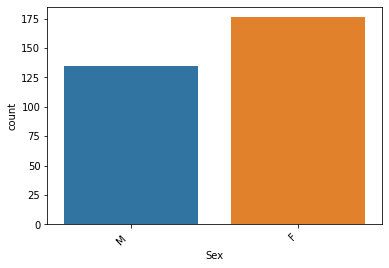

Jumlah kategori unik : 2
Jumlah nilai kategori unik : ['M ', 'F']
Jumlah total nilai kategori unik :
F     176
M     135
Name: Sex, dtype: int64


Iterasi ke- 4
Kolom :  MaritalDesc


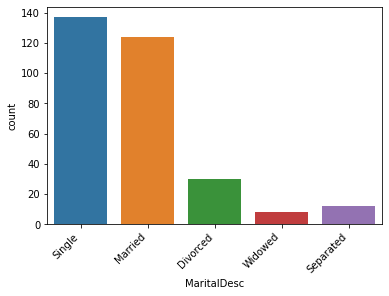

Jumlah kategori unik : 5
Jumlah nilai kategori unik : ['Single', 'Married', 'Divorced', 'Widowed', 'Separated']
Jumlah total nilai kategori unik :
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64


Iterasi ke- 5
Kolom :  CitizenDesc


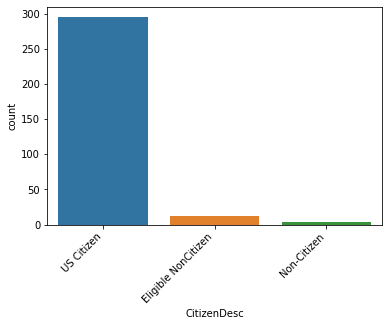

Jumlah kategori unik : 3
Jumlah nilai kategori unik : ['US Citizen', 'Eligible NonCitizen', 'Non-Citizen']
Jumlah total nilai kategori unik :
US Citizen             295
Eligible NonCitizen     12
Non-Citizen              4
Name: CitizenDesc, dtype: int64


Iterasi ke- 6
Kolom :  HispanicLatino


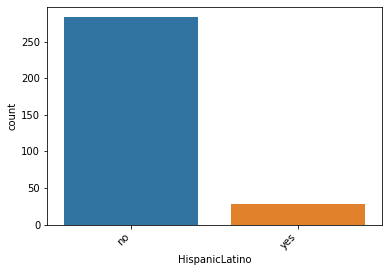

Jumlah kategori unik : 2
Jumlah nilai kategori unik : ['no', 'yes']
Jumlah total nilai kategori unik :
no     283
yes     28
Name: HispanicLatino, dtype: int64


Iterasi ke- 7
Kolom :  RaceDesc


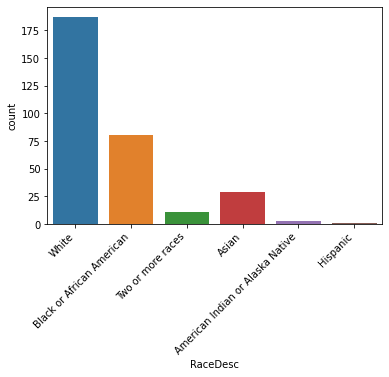

Jumlah kategori unik : 6
Jumlah nilai kategori unik : ['White', 'Black or African American', 'Two or more races', 'Asian', 'American Indian or Alaska Native', 'Hispanic']
Jumlah total nilai kategori unik :
White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: RaceDesc, dtype: int64


Iterasi ke- 8
Kolom :  TermReason


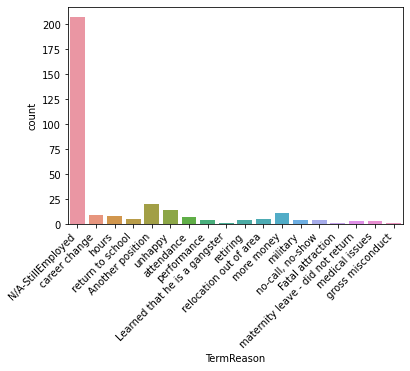

Jumlah kategori unik : 18
Jumlah nilai kategori unik : ['N/A-StillEmployed', 'career change', 'hours', 'return to school', 'Another position', 'unhappy', 'attendance', 'performance', 'Learned that he is a gangster', 'retiring', 'relocation out of area', 'more money', 'military', 'no-call, no-show', 'Fatal attraction', 'maternity leave - did not return', 'medical issues', 'gross misconduct']
Jumlah total nilai kategori unik :
N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
no-call, no-show                      4
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
medical iss

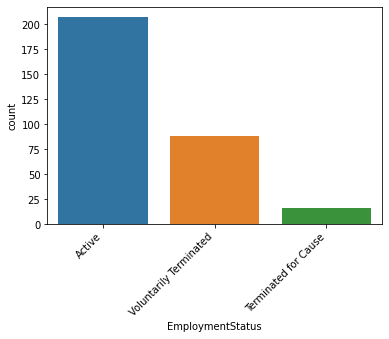

Jumlah kategori unik : 3
Jumlah nilai kategori unik : ['Active', 'Voluntarily Terminated', 'Terminated for Cause']
Jumlah total nilai kategori unik :
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: EmploymentStatus, dtype: int64


Iterasi ke- 10
Kolom :  Department


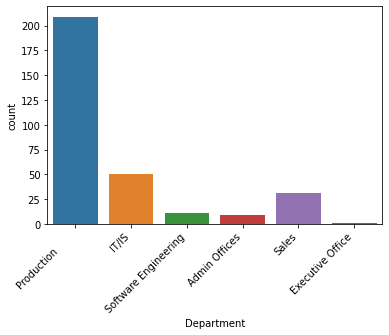

Jumlah kategori unik : 6
Jumlah nilai kategori unik : ['Production       ', 'IT/IS', 'Software Engineering', 'Admin Offices', 'Sales', 'Executive Office']
Jumlah total nilai kategori unik :
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64


Iterasi ke- 11
Kolom :  RecruitmentSource


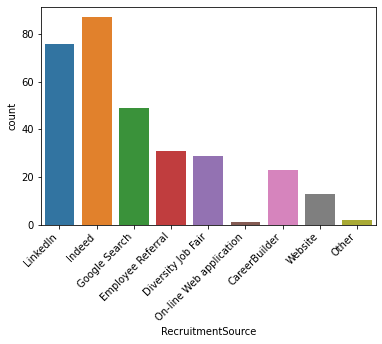

Jumlah kategori unik : 9
Jumlah nilai kategori unik : ['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral', 'Diversity Job Fair', 'On-line Web application', 'CareerBuilder', 'Website', 'Other']
Jumlah total nilai kategori unik :
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64


Iterasi ke- 12
Kolom :  PerformanceScore


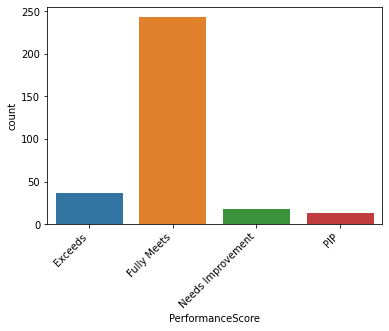

Jumlah kategori unik : 4
Jumlah nilai kategori unik : ['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']
Jumlah total nilai kategori unik :
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64



In [ ]:
# categorical list
list_kategori = list(df_cat.columns)

# loop
iter = 1
for i in list_kategori:
  print()
  print('Iterasi ke-',iter)
  print('Kolom : ',i)
  sns.countplot(data = df_cat, x = i)
  plt.xticks(rotation=45, ha='right')
  plt.show()
    
  print('Jumlah kategori unik :', len(df_cat[i].unique()))
  print('Jumlah nilai kategori unik :', list(df_cat[i].unique()))
  print('Jumlah total nilai kategori unik :')
  print(df_cat[i].value_counts())
  iter+=1
  print()


iterasi ke- 1
Hubungan label dengan kolom FromDiversityJobFairID


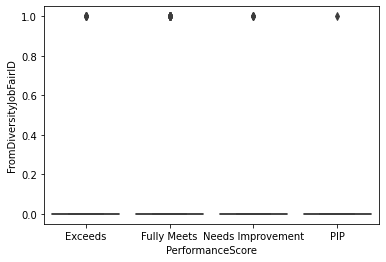

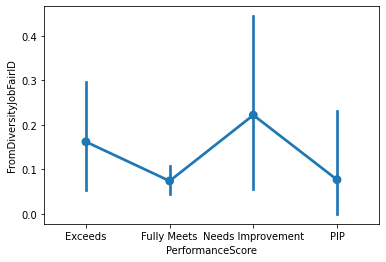

Nilai t-test : nan
Nilai pvalue t-test : nan
Dikarenakan nilai pvalue ttest > 0.05 maka tolak H0
Kesimpulan : mean variabel numerik kelompok label 1 ≠ mean variabel numerik kelompok label 0


iterasi ke- 2
Hubungan label dengan kolom Salary


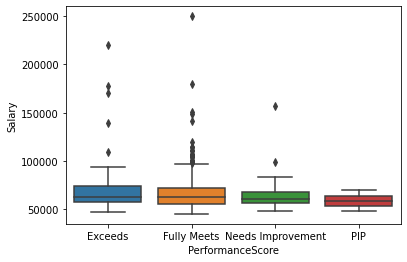

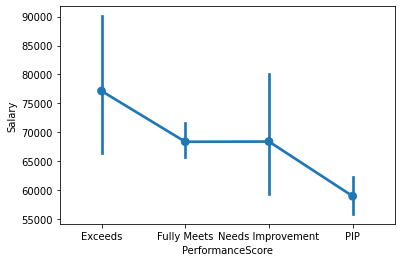

Nilai t-test : nan
Nilai pvalue t-test : nan
Dikarenakan nilai pvalue ttest > 0.05 maka tolak H0
Kesimpulan : mean variabel numerik kelompok label 1 ≠ mean variabel numerik kelompok label 0


iterasi ke- 3
Hubungan label dengan kolom Termd


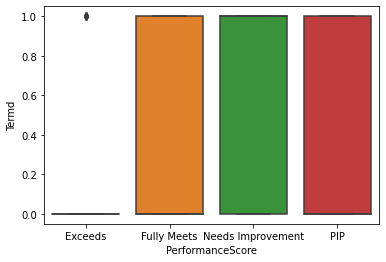

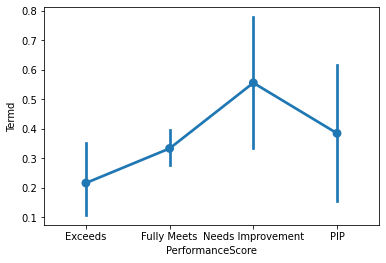

Nilai t-test : nan
Nilai pvalue t-test : nan
Dikarenakan nilai pvalue ttest > 0.05 maka tolak H0
Kesimpulan : mean variabel numerik kelompok label 1 ≠ mean variabel numerik kelompok label 0


iterasi ke- 4
Hubungan label dengan kolom EngagementSurvey


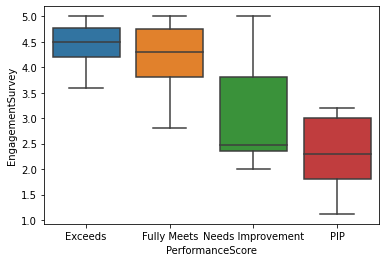

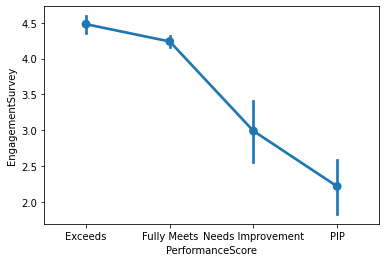

Nilai t-test : nan
Nilai pvalue t-test : nan
Dikarenakan nilai pvalue ttest > 0.05 maka tolak H0
Kesimpulan : mean variabel numerik kelompok label 1 ≠ mean variabel numerik kelompok label 0


iterasi ke- 5
Hubungan label dengan kolom EmpSatisfaction


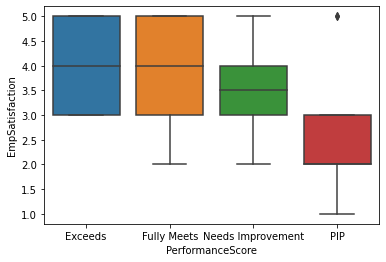

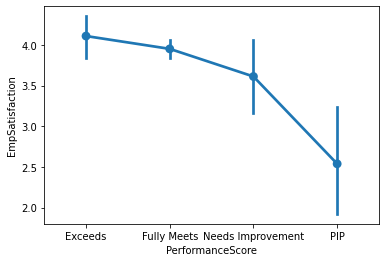

Nilai t-test : nan
Nilai pvalue t-test : nan
Dikarenakan nilai pvalue ttest > 0.05 maka tolak H0
Kesimpulan : mean variabel numerik kelompok label 1 ≠ mean variabel numerik kelompok label 0


iterasi ke- 6
Hubungan label dengan kolom SpecialProjectsCount


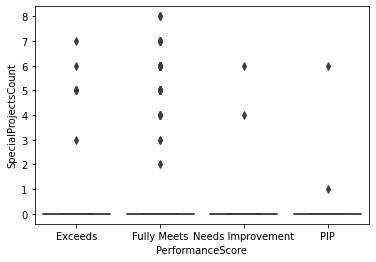

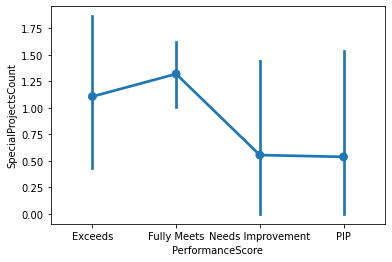

Nilai t-test : nan
Nilai pvalue t-test : nan
Dikarenakan nilai pvalue ttest > 0.05 maka tolak H0
Kesimpulan : mean variabel numerik kelompok label 1 ≠ mean variabel numerik kelompok label 0


iterasi ke- 7
Hubungan label dengan kolom DaysLateLast30


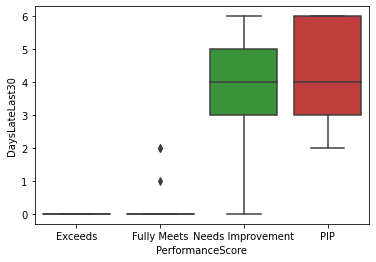

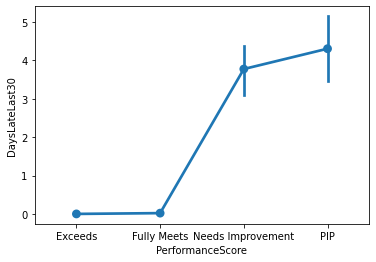

Nilai t-test : nan
Nilai pvalue t-test : nan
Dikarenakan nilai pvalue ttest > 0.05 maka tolak H0
Kesimpulan : mean variabel numerik kelompok label 1 ≠ mean variabel numerik kelompok label 0


iterasi ke- 8
Hubungan label dengan kolom Absences


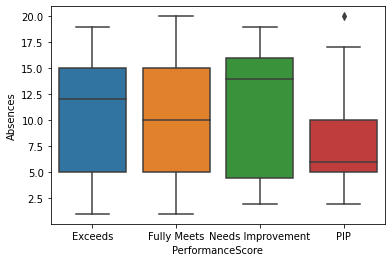

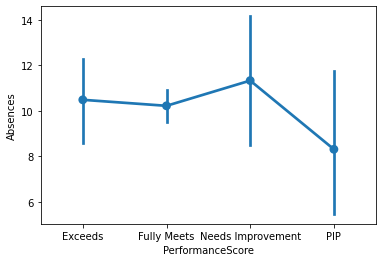

Nilai t-test : nan
Nilai pvalue t-test : nan
Dikarenakan nilai pvalue ttest > 0.05 maka tolak H0
Kesimpulan : mean variabel numerik kelompok label 1 ≠ mean variabel numerik kelompok label 0



In [ ]:
# EDA for multivariate

# continous data type
# list without left
list_kontinu = list(df_num.columns)

# Membuat loop
iter=1
for i in list_kontinu:
  print()
  print('iterasi ke-',iter)
  print('Hubungan label dengan kolom',i)
  
  sns.boxplot(data=data, x='PerformanceScore', y=i)
  plt.show()
  print()
  sns.pointplot(data=data, x='PerformanceScore', y=i,kind='point')
  plt.show()

  alp = 0.05
  group1 = data[(data['PerformanceScore']==1)][i]
  group0 = data[(data['PerformanceScore']==0)][i]
  ttest_coef,ttest_pval = ttest_ind(group1,group0,nan_policy='omit', alternative='two-sided')
  print('Nilai t-test :',ttest_coef)
  print('Nilai pvalue t-test :',ttest_pval)
  if ttest_pval < 0.05 :
    print('Dikarenakan nilai pvalue ttest < 0.05 maka terima H0')
    print('Kesimpulan : mean variabel numerik kelompok label 1 = mean variabel numerik kelompok label 0')
  else : 
    print('Dikarenakan nilai pvalue ttest > 0.05 maka tolak H0')
    print('Kesimpulan : mean variabel numerik kelompok label 1 ≠ mean variabel numerik kelompok label 0')

  iter+=1
  print()

In [ ]:
df_cat.columns

Index(['Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'TermReason', 'EmploymentStatus',
       'Department', 'RecruitmentSource', 'PerformanceScore'],
      dtype='object')

iterasi ke- 1
Hubungan label dengan kolom Position


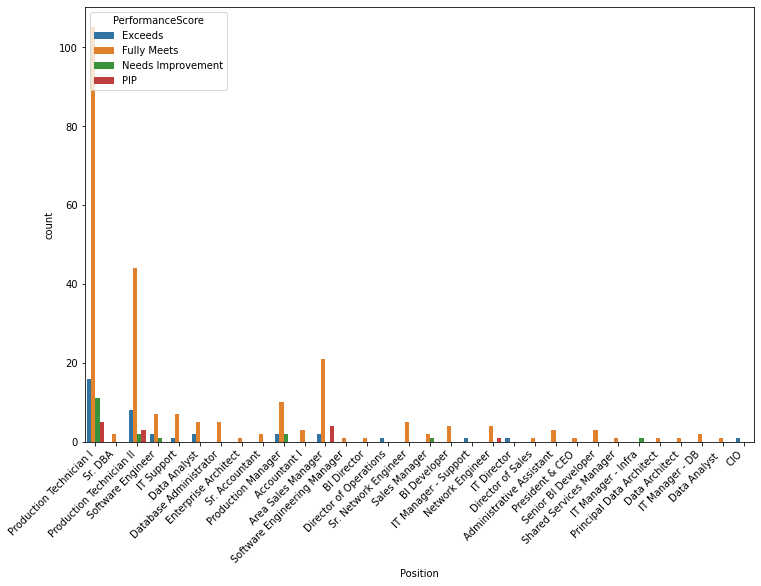

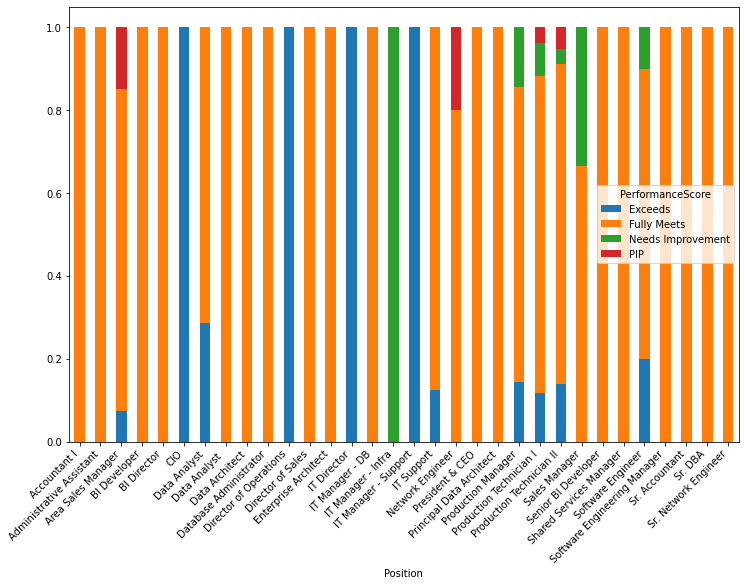


iterasi ke- 2
Hubungan label dengan kolom State


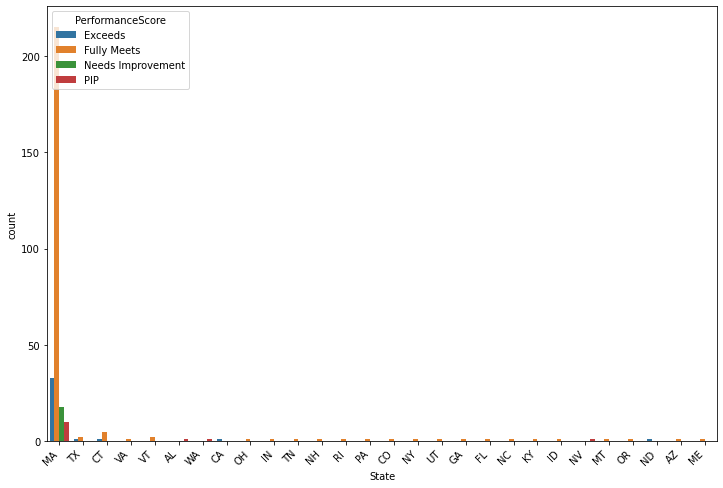

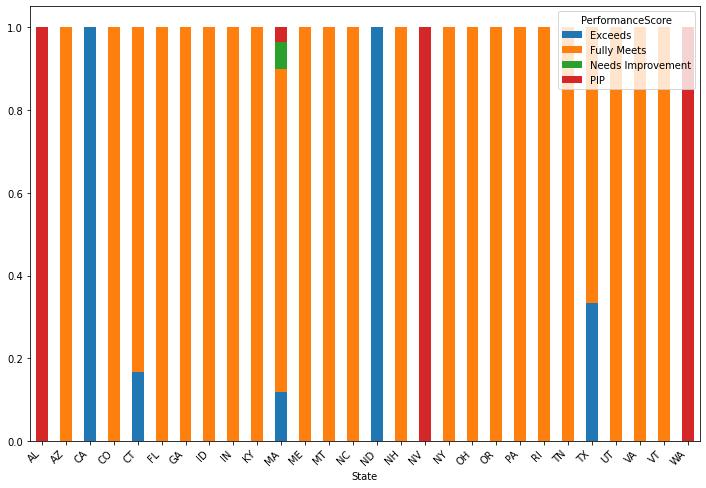


iterasi ke- 3
Hubungan label dengan kolom Sex


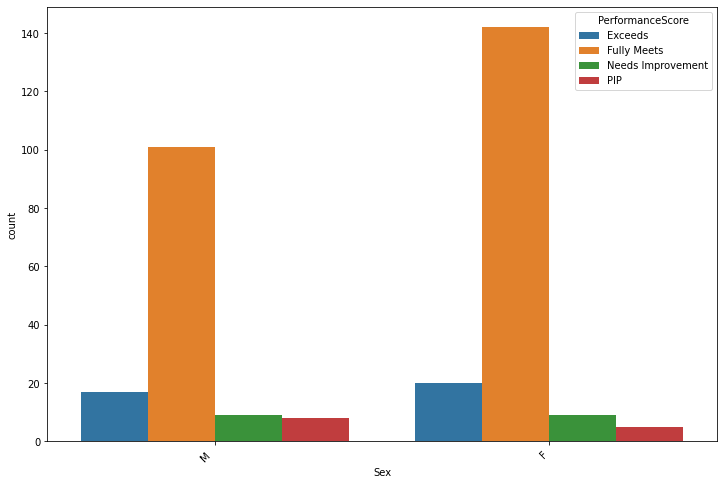

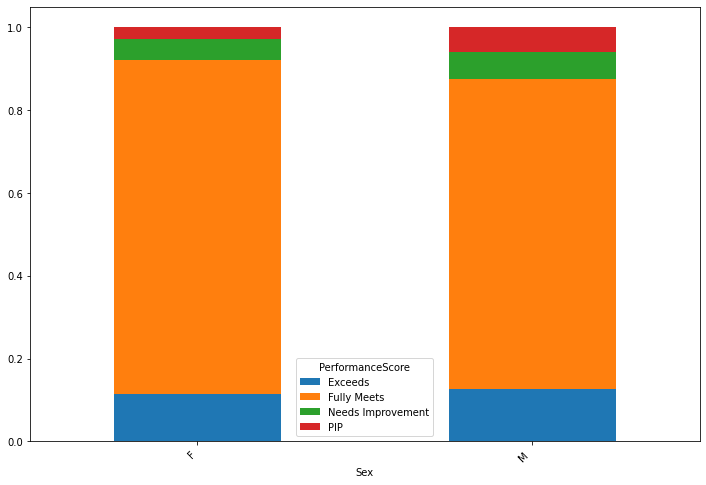


iterasi ke- 4
Hubungan label dengan kolom MaritalDesc


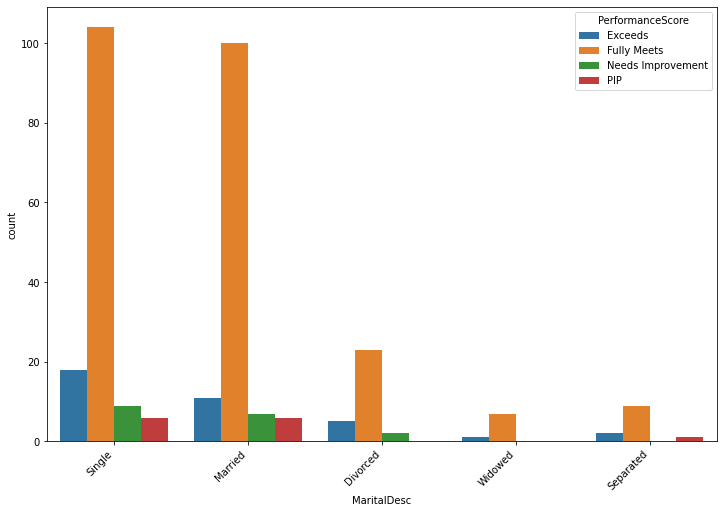

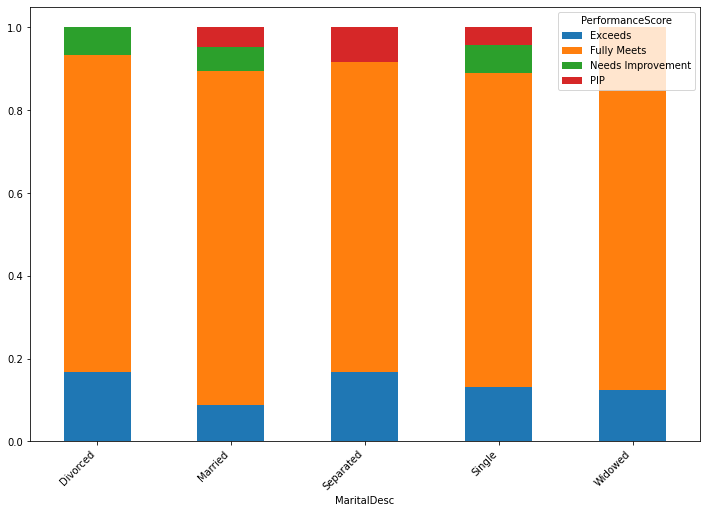


iterasi ke- 5
Hubungan label dengan kolom CitizenDesc


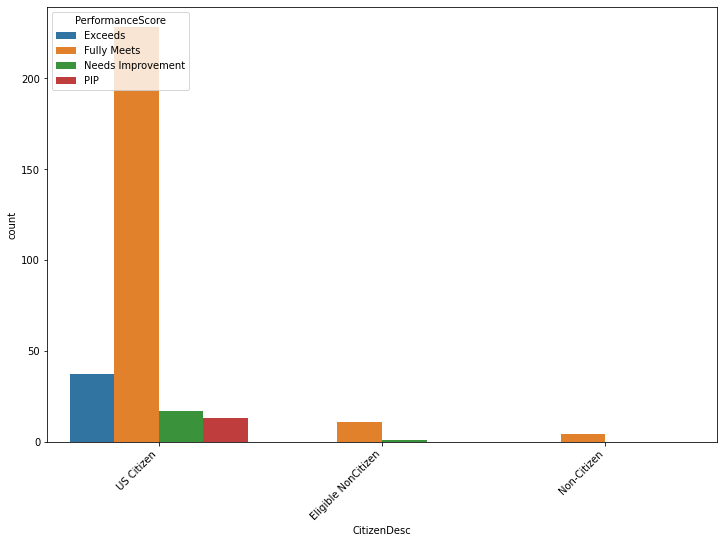

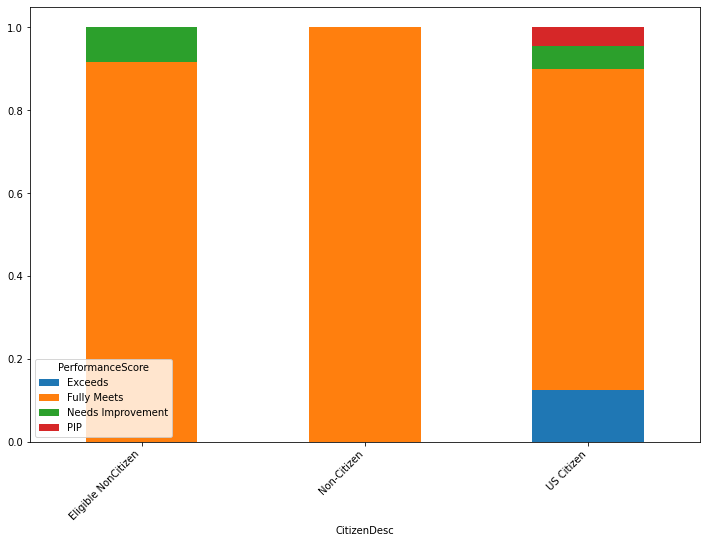


iterasi ke- 6
Hubungan label dengan kolom HispanicLatino


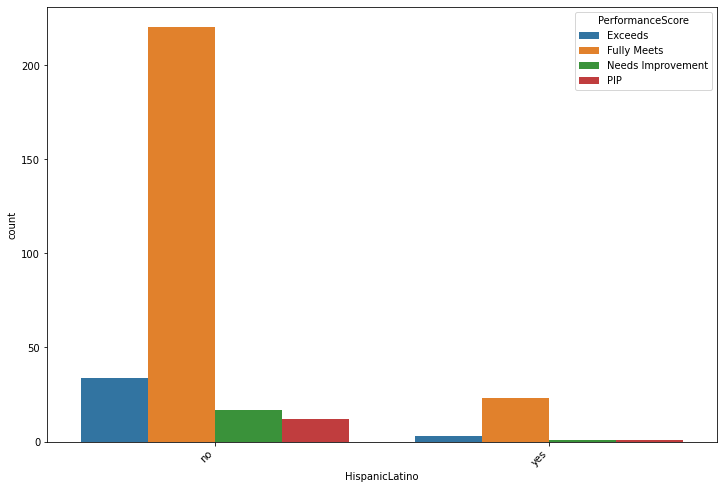

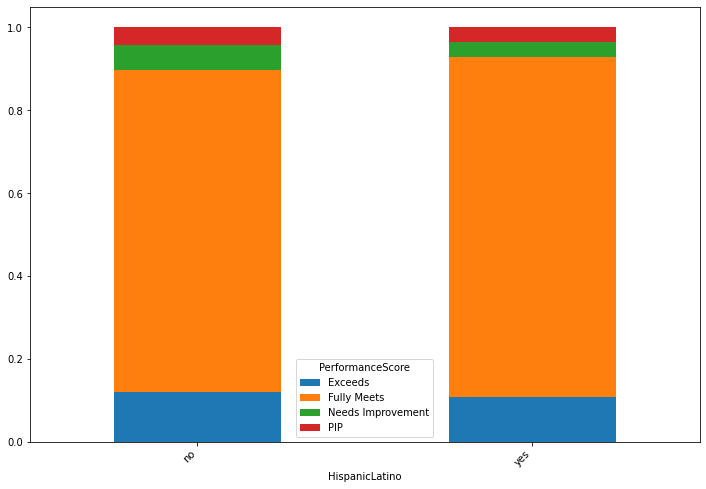


iterasi ke- 7
Hubungan label dengan kolom RaceDesc


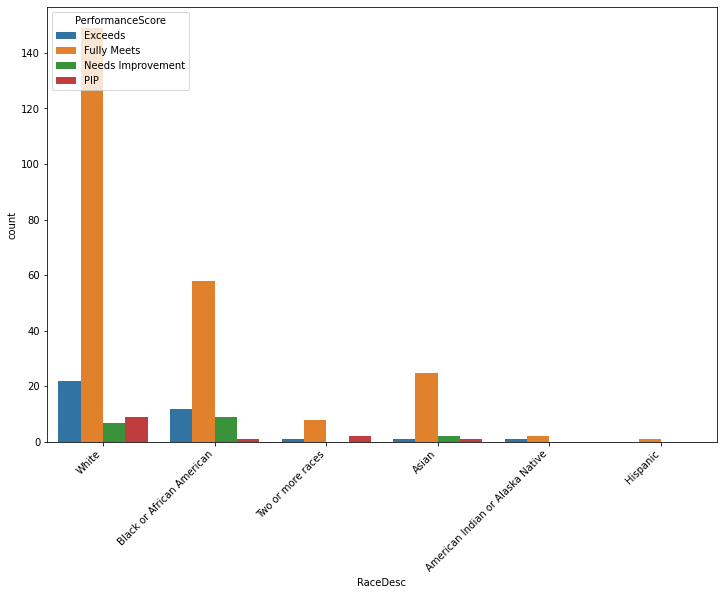

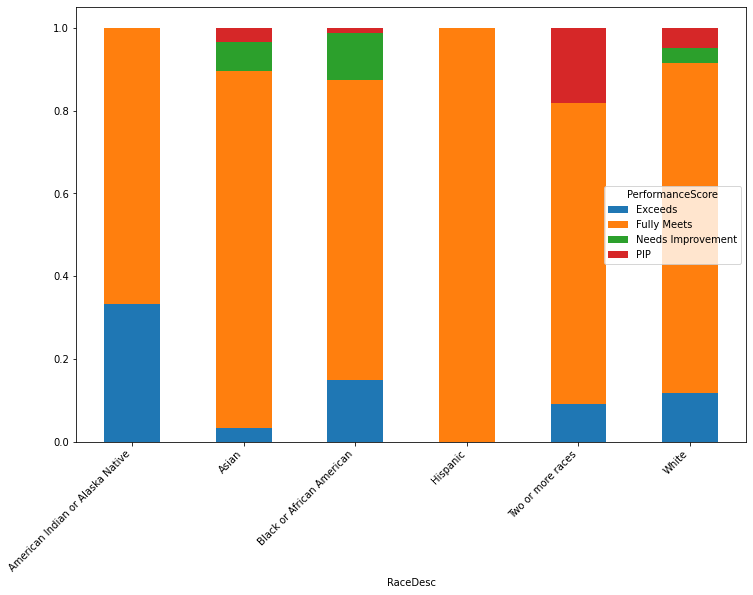


iterasi ke- 8
Hubungan label dengan kolom TermReason


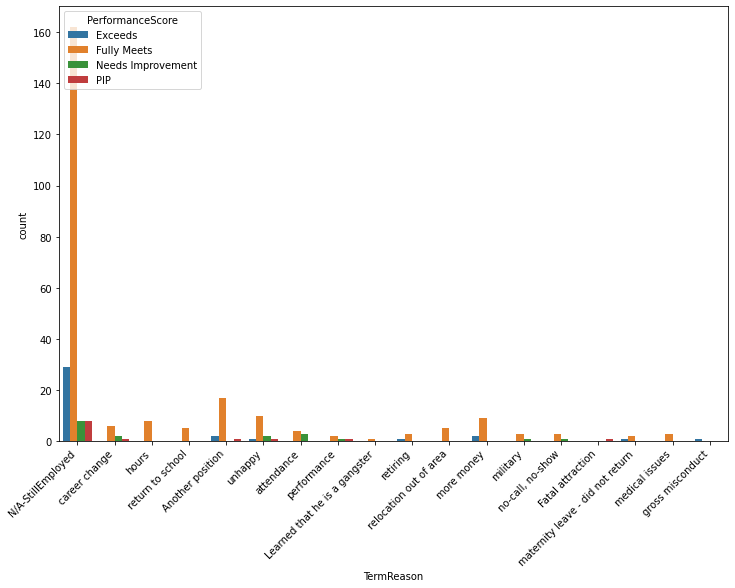

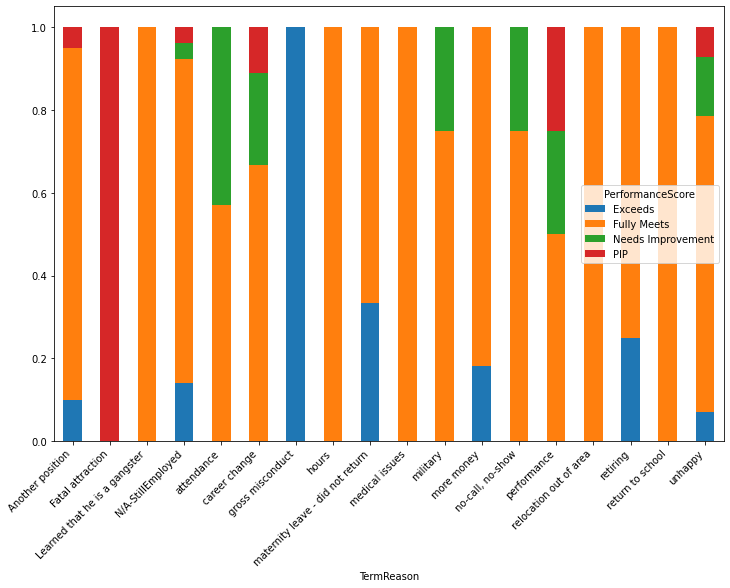


iterasi ke- 9
Hubungan label dengan kolom EmploymentStatus


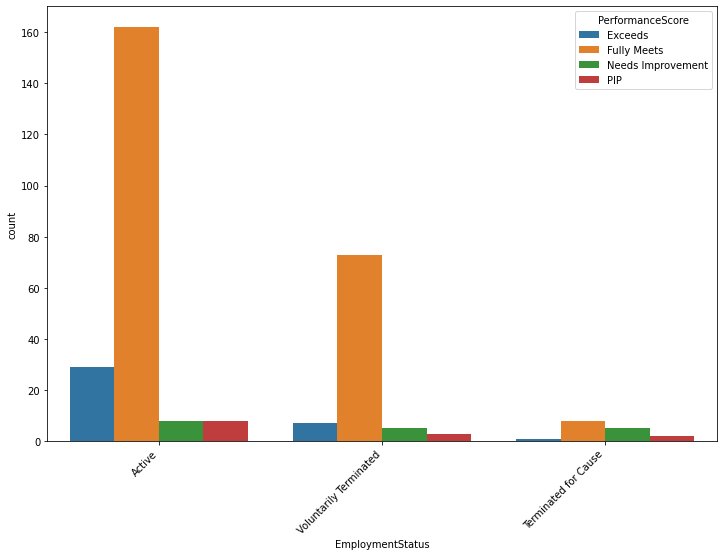

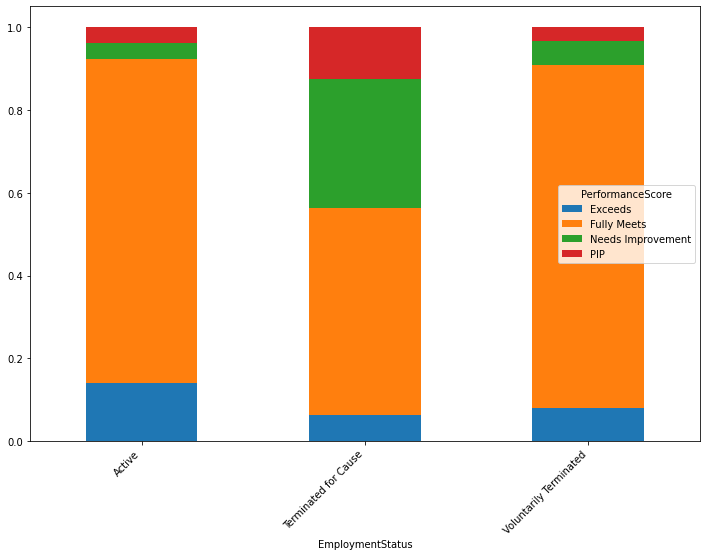


iterasi ke- 10
Hubungan label dengan kolom Department


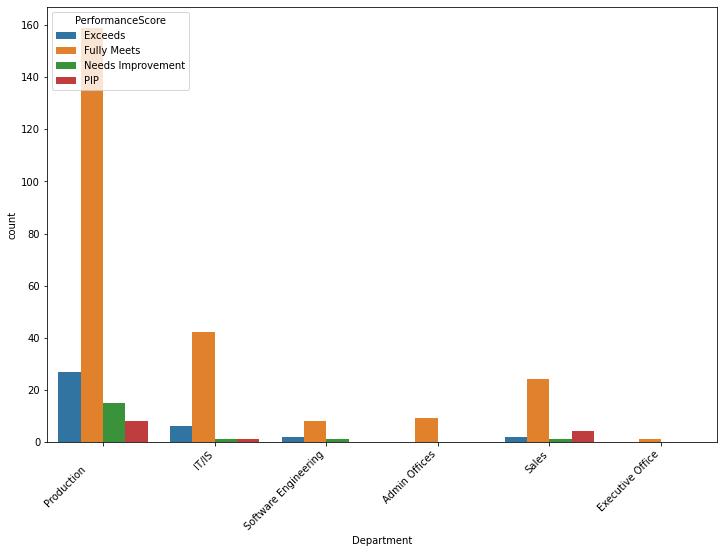

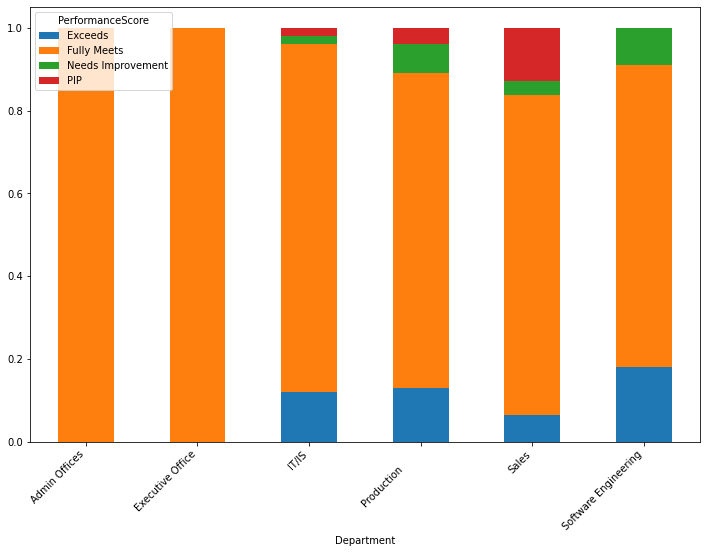


iterasi ke- 11
Hubungan label dengan kolom RecruitmentSource


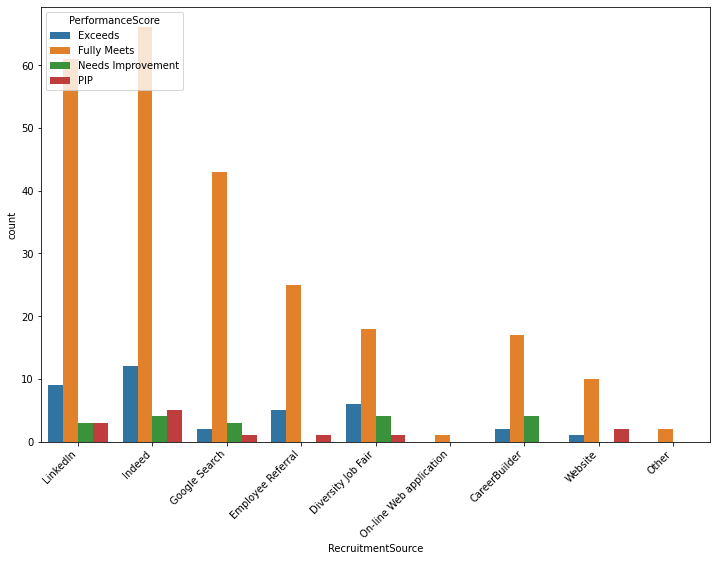

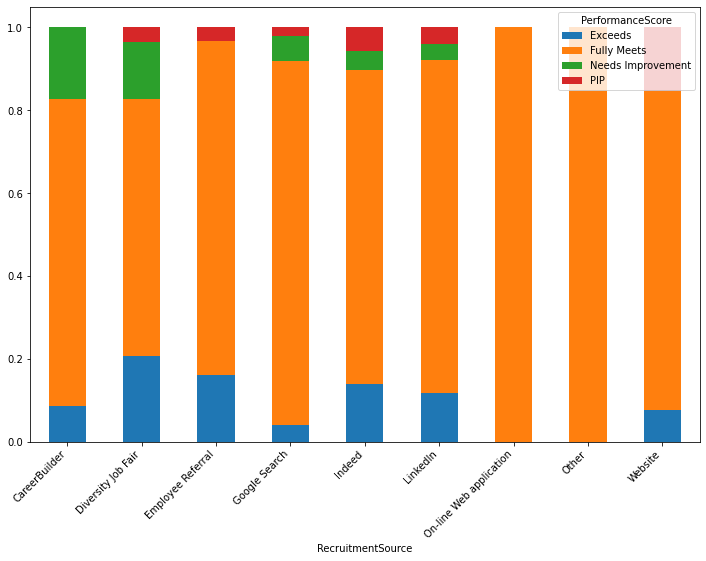

In [ ]:
# EDA for multivariate

# categorical data type
list_kategorikal = list(df_cat.columns)
list_kategorikal.remove('PerformanceScore')

iter = 1
# loop
for i in list_kategorikal:
  print('iterasi ke-',iter)
  print('Hubungan label dengan kolom',i)
  plt.figure(figsize=(12,8))
  sns.countplot(data=df_cat, x=i, hue=data['PerformanceScore'])
  plt.xticks(rotation=45, ha='right')
  pd.crosstab(data_cat[i], data['PerformanceScore'], normalize='index').plot(kind='bar', stacked=True,figsize=(12,8))
  plt.xticks(rotation=45, ha='right')
  plt.show()
  iter+=1
  print()

In [ ]:
# Insight

# Pegawai yang berasal dari kota Nevada, Washington, dan ALabama memiliki peforma terburuk
# Alasan karyawan yang memiliki peforma tinggi melakukan resign dikarenakan adanya perlakuan tidak baik di lingkungan kerja
# Departemen Sales memiliki pegawai nilai peforma buruk dengan persentase tertinggi.
# Peforma pegawai yang bersumber dari tempat diversity job fair, referalm google search, Indeed, dan linkedin memiliki peforma yang kurang ketimbang yang lainnya

#Data Preparation

## Handling Missing Value & Duplicate

In [ ]:
# Melihat duplikat dalam data

data.duplicated().sum()

0

In [ ]:
# Melihat jumlah persentase missing value

data.isna().sum()/len(data)*100

Employee_Name                  0.000000
EmpID                          0.000000
MarriedID                      0.000000
MaritalStatusID                0.000000
GenderID                       0.000000
EmpStatusID                    0.000000
DeptID                         0.000000
PerfScoreID                    0.000000
FromDiversityJobFairID         0.000000
Salary                         0.000000
Termd                          0.000000
PositionID                     0.000000
Position                       0.000000
State                          0.000000
Zip                            0.000000
DOB                            0.000000
Sex                            0.000000
MaritalDesc                    0.000000
CitizenDesc                    0.000000
HispanicLatino                 0.000000
RaceDesc                       0.000000
DateofHire                     0.000000
DateofTermination             66.559486
TermReason                     0.000000
EmploymentStatus               0.000000


In [ ]:
# Date of termination akan di drop sedangkan manager ID akan dilakukan imputasi jika digunakan dalam model.

# Feature Engineering

## Feature Synthesis

In [ ]:
# Mengubah fitur/variabel baru berdasarkan data tanggal lahir menjadi umur
# Mengubah variabel datetime menjadi numerik

today = date.today()
df['Age'] = (today.year - df['DOB'].dt.year)
df['DaysWorked'] = (today.year - df['DateofHire'].dt.day)
df['DaysSinceLastReview'] = (today.year - df['LastPerformanceReview_Date'].dt.day)

## Feature Transformation

In [ ]:
# Mengganti DOB dengan Age
# Mengurangi fitur yang terlalu banyak unique value

df = df.drop(['DOB','DateofTermination', 'Position','State','TermReason','LastPerformanceReview_Date','DateofHire','HispanicLatino','Department'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FromDiversityJobFairID  311 non-null    int64  
 1   Salary                  311 non-null    int64  
 2   Termd                   311 non-null    int64  
 3   Sex                     311 non-null    object 
 4   MaritalDesc             311 non-null    object 
 5   CitizenDesc             311 non-null    object 
 6   RaceDesc                311 non-null    object 
 7   EmploymentStatus        311 non-null    object 
 8   RecruitmentSource       311 non-null    object 
 9   PerformanceScore        311 non-null    object 
 10  EngagementSurvey        311 non-null    float64
 11  EmpSatisfaction         311 non-null    int64  
 12  SpecialProjectsCount    311 non-null    int64  
 13  DaysLateLast30          311 non-null    int64  
 14  Absences                311 non-null    in

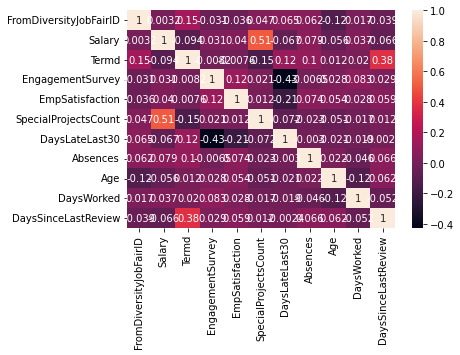

In [ ]:
# Variable correlation

ax, fig = plt.subplots()
corr = df.corr(method='spearman')
sns.heatmap(corr,annot=True)

In [ ]:
# Transformasi Perfromance Score

PS = {'Class':['PIP','Needs Improvement','Fully Meets','Exceeds'],'Score':[1,2,3,4]}
df_score = pd.DataFrame(data=PS)
dict_scor = dict(df_score.values)
df['PerformanceScore']= df['PerformanceScore'].map(dict_scor)

In [ ]:
# Mendeklarasi X dan Y

X = df.drop(['PerformanceScore'],axis=1)
Y = df['PerformanceScore']

In [ ]:
# Melihat rasio label Y

Y.value_counts(normalize=True)

3    0.781350
4    0.118971
2    0.057878
1    0.041801
Name: PerformanceScore, dtype: float64

In [ ]:
# Melakukan pemisahan train test split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [ ]:
# Melihat ukuran dataset dari train test

print('X train :',X_train.shape)
print('y train :',y_train.shape)
print('X test :',X_test.shape)
print('y test :',y_test.shape)

X train : (248, 17)
y train : (248,)
X test : (63, 17)
y test : (63,)


In [ ]:
# Data Train

In [ ]:
# Memishakan data kategorikal dan kontinu

X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes('object')

In [ ]:
# Melakukan scaling

rs = RobustScaler()
X_train_num_sc = pd.DataFrame(rs.fit_transform(X_train_num),columns =rs.get_feature_names_out(X_train_num.columns))
X_train_num_sc

,FromDiversityJobFairID,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,DaysWorked,DaysSinceLastReview
0,0.0,-0.307474,0.0,0.701493,-0.5,0.0,0.0,-0.9,0.7,0.600000,-0.655738
1,0.0,-0.849904,0.0,0.701493,0.5,0.0,0.0,0.1,0.8,-0.066667,-0.196721
2,0.0,-0.297626,1.0,-1.159204,-0.5,0.0,0.0,0.6,-7.0,0.266667,0.721311
3,0.0,0.906069,0.0,-0.194030,-0.5,0.0,0.0,0.1,0.4,-1.266667,-0.393443
4,0.0,0.064372,1.0,0.701493,0.5,0.0,0.0,0.7,0.2,-0.666667,0.786885
...,...,...,...,...,...,...,...,...,...,...,...
243,0.0,0.712924,0.0,0.004975,0.5,7.0,0.0,1.0,-0.4,-1.266667,0.327869
244,0.0,0.748855,1.0,0.701493,-0.5,5.0,0.0,0.1,-0.3,0.400000,0.000000
245,0.0,1.805781,0.0,0.203980,0.5,5.0,0.0,-0.9,0.2,0.266667,-0.196721
246,0.0,-0.547354,1.0,-0.751244,0.5,0.0,4.0,0.5,-0.3,0.066667,0.590164


In [ ]:
# Melakukan encoder

ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat_enc = pd.DataFrame(ohe.fit_transform(X_train_cat).toarray(),columns =ohe.get_feature_names_out(X_train_cat.columns))
X_train_cat_enc

,Sex_F,Sex_M,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,CitizenDesc_Eligible NonCitizen,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,EmploymentStatus_Active,EmploymentStatus_Terminated for Cause,EmploymentStatus_Voluntarily Terminated,RecruitmentSource_CareerBuilder,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Website
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
244,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Menggabungkan kedua jenis data menjadi satu

X_train_concat = pd.concat([X_train_num_sc, X_train_cat_enc], axis = 1)
X_train_concat

,FromDiversityJobFairID,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,DaysWorked,DaysSinceLastReview,Sex_F,Sex_M,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,CitizenDesc_Eligible NonCitizen,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,EmploymentStatus_Active,EmploymentStatus_Terminated for Cause,EmploymentStatus_Voluntarily Terminated,RecruitmentSource_CareerBuilder,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Website
0,0.0,-0.307474,0.0,0.701493,-0.5,0.0,0.0,-0.9,0.7,0.600000,-0.655738,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,-0.849904,0.0,0.701493,0.5,0.0,0.0,0.1,0.8,-0.066667,-0.196721,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,-0.297626,1.0,-1.159204,-0.5,0.0,0.0,0.6,-7.0,0.266667,0.721311,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.906069,0.0,-0.194030,-0.5,0.0,0.0,0.1,0.4,-1.266667,-0.393443,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.064372,1.0,0.701493,0.5,0.0,0.0,0.7,0.2,-0.666667,0.786885,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.0,0.712924,0.0,0.004975,0.5,7.0,0.0,1.0,-0.4,-1.266667,0.327869,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
244,0.0,0.748855,1.0,0.701493,-0.5,5.0,0.0,0.1,-0.3,0.400000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,0.0,1.805781,0.0,0.203980,0.5,5.0,0.0,-0.9,0.2,0.266667,-0.196721,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246,0.0,-0.547354,1.0,-0.751244,0.5,0.0,4.0,0.5,-0.3,0.066667,0.590164,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 4. Feature Selection

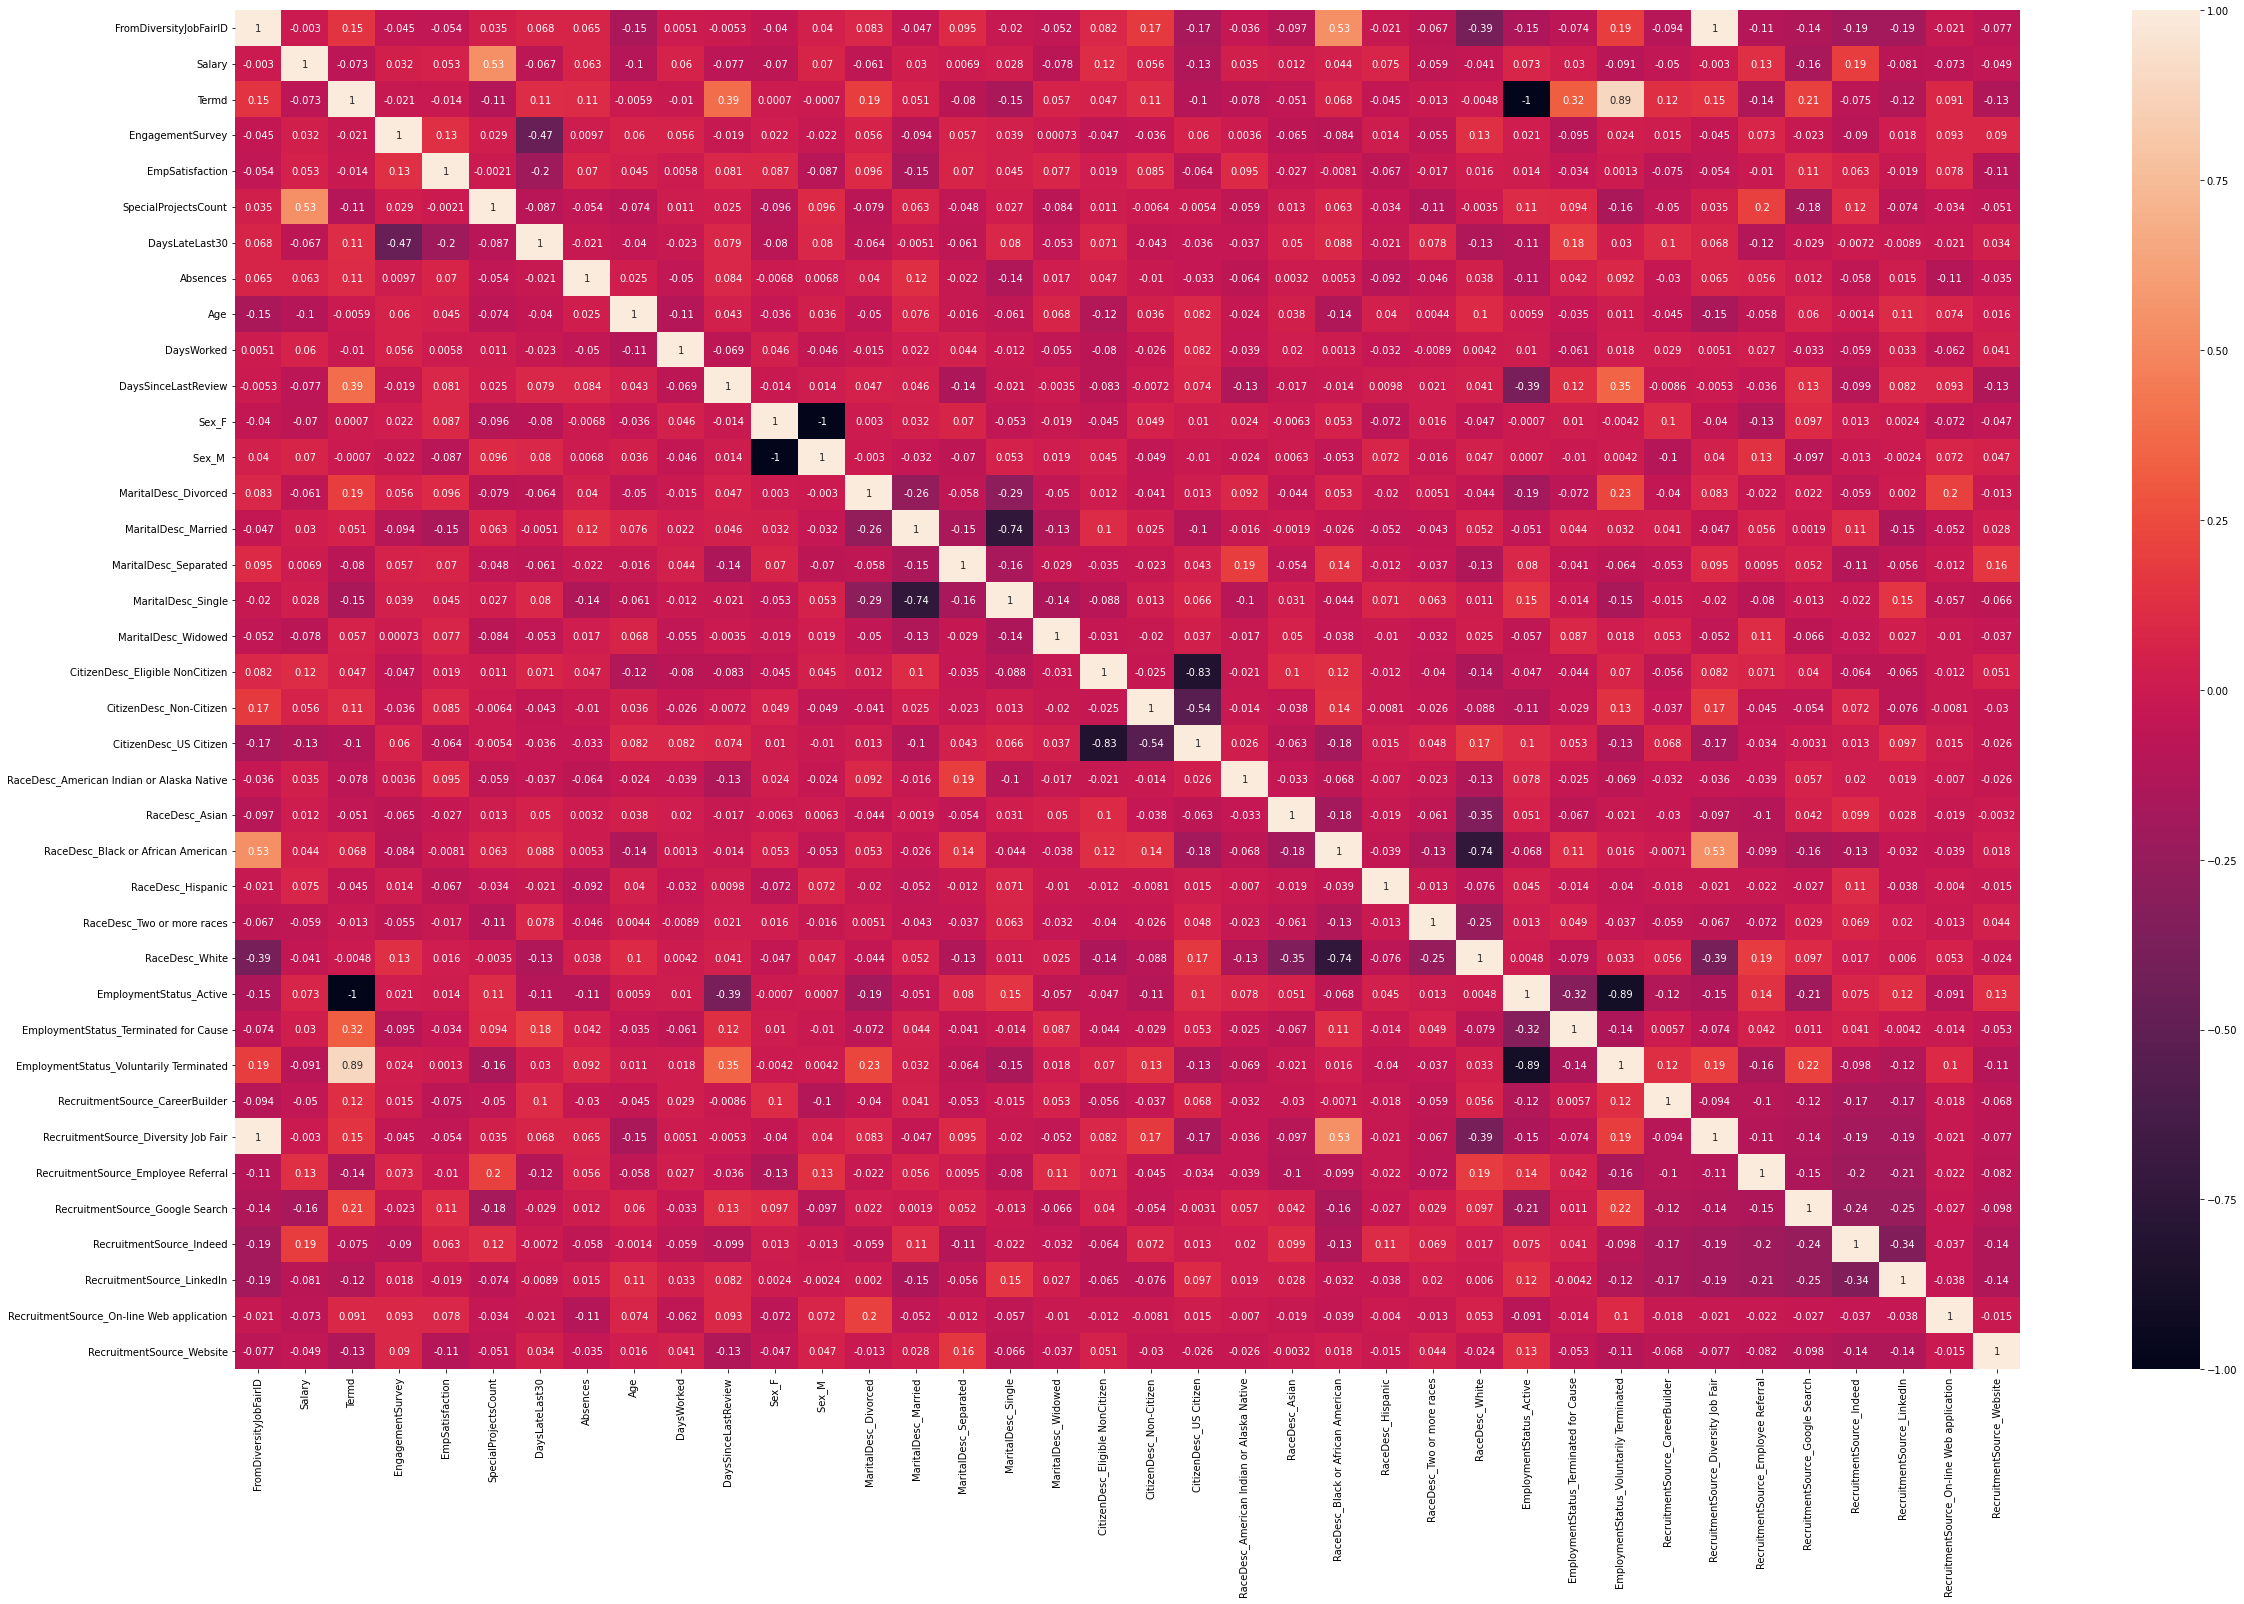

In [ ]:
# Melihat korelasi antar variabel

ax, fig = plt.subplots(figsize=[40,25])
corr = X_train_concat.corr(method='spearman')
sns.heatmap(corr,annot=True)

In [ ]:
# Menentukan feature apa saja yang akan dipakai

fitur = X_train_concat.columns
alpha = 0.05
list_drop = []
list_keep = []
for i in range(len(fitur)):
  for j in range(i+1,len(fitur)):
    cor, pval = spearmanr(X_train_concat[fitur[i]], X_train_concat[fitur[j]])
    if pval < alpha and (abs(cor)) >= 0.7:
      list_drop.append(fitur[i])
    else:
      list_keep.append(fitur[i])

In [ ]:
# Melihat list feature yang didrop

list_drop

['FromDiversityJobFairID',
 'Termd',
 'Termd',
 'Sex_F',
 'MaritalDesc_Married',
 'CitizenDesc_Eligible NonCitizen',
 'RaceDesc_Black or African American',
 'EmploymentStatus_Active']

In [ ]:
# Memisahkan feature yang digunakan dalam model

X_train_no_select = X_train_concat.copy()
X_train_concat.drop(list_drop, axis=1, inplace=True)
X_train_concat

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,DaysWorked,DaysSinceLastReview,Sex_M,MaritalDesc_Divorced,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,EmploymentStatus_Terminated for Cause,EmploymentStatus_Voluntarily Terminated,RecruitmentSource_CareerBuilder,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Website
0,-0.307474,0.701493,-0.5,0.0,0.0,-0.9,0.7,0.600000,-0.655738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.849904,0.701493,0.5,0.0,0.0,0.1,0.8,-0.066667,-0.196721,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.297626,-1.159204,-0.5,0.0,0.0,0.6,-7.0,0.266667,0.721311,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.906069,-0.194030,-0.5,0.0,0.0,0.1,0.4,-1.266667,-0.393443,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.064372,0.701493,0.5,0.0,0.0,0.7,0.2,-0.666667,0.786885,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.712924,0.004975,0.5,7.0,0.0,1.0,-0.4,-1.266667,0.327869,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
244,0.748855,0.701493,-0.5,5.0,0.0,0.1,-0.3,0.400000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,1.805781,0.203980,0.5,5.0,0.0,-0.9,0.2,0.266667,-0.196721,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246,-0.547354,-0.751244,0.5,0.0,4.0,0.5,-0.3,0.066667,0.590164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Menggunakan KBest untuk memilih feature yang digunakan dengan mutual info classifier

np.random.seed(42)
random.seed(42)
kbest =SelectKBest(score_func=mutual_info_classif,k=10)
kbest.fit(X_train_concat,y_train)

SelectKBest(score_func=<function mutual_info_classif at 0x7fb156ef67a0>)

In [ ]:
# Melihat feature yang digunakan dengan Kbest dan mutual info classifier

final_fitur = X_train_concat.columns[kbest.get_support()]
final_fitur

Index(['EngagementSurvey', 'EmpSatisfaction', 'DaysLateLast30', 'Absences',
       'DaysWorked', 'MaritalDesc_Divorced', 'CitizenDesc_US Citizen',
       'EmploymentStatus_Terminated for Cause',
       'EmploymentStatus_Voluntarily Terminated',
       'RecruitmentSource_Google Search'],
      dtype='object')

In [ ]:
# Membuat dataframe feature yang digunakan dengan Kbest dan mutual info classifier

X_train_final = X_train_concat.loc[:,final_fitur]
X_train_final

,EngagementSurvey,EmpSatisfaction,DaysLateLast30,Absences,DaysWorked,MaritalDesc_Divorced,CitizenDesc_US Citizen,EmploymentStatus_Terminated for Cause,EmploymentStatus_Voluntarily Terminated,RecruitmentSource_Google Search
0,0.701493,-0.5,0.0,-0.9,0.600000,0.0,1.0,0.0,0.0,0.0
1,0.701493,0.5,0.0,0.1,-0.066667,0.0,1.0,0.0,0.0,0.0
2,-1.159204,-0.5,0.0,0.6,0.266667,0.0,1.0,0.0,1.0,1.0
3,-0.194030,-0.5,0.0,0.1,-1.266667,0.0,1.0,0.0,0.0,0.0
4,0.701493,0.5,0.0,0.7,-0.666667,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
243,0.004975,0.5,0.0,1.0,-1.266667,0.0,1.0,0.0,0.0,0.0
244,0.701493,-0.5,0.0,0.1,0.400000,0.0,1.0,0.0,1.0,0.0
245,0.203980,0.5,0.0,-0.9,0.266667,0.0,1.0,0.0,0.0,0.0
246,-0.751244,0.5,4.0,0.5,0.066667,0.0,1.0,0.0,1.0,1.0


In [ ]:
# Data Test

In [ ]:
# Memisahkan data kategorikal dan kontinu data test

X_test_num = X_test.select_dtypes('number')
X_test_cat = X_test.select_dtypes('object')

In [ ]:
# Melakukan scaling

X_test_num_sc = pd.DataFrame(rs.transform(X_test_num),columns =rs.get_feature_names_out(X_test_num.columns))
X_test_num_sc

,FromDiversityJobFairID,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,DaysWorked,DaysSinceLastReview
0,0.0,-0.710835,1.0,0.701493,0.0,0.0,0.0,-0.8,-0.4,0.000000,0.918033
1,0.0,-0.603459,1.0,-1.109453,0.0,0.0,0.0,0.6,0.4,0.400000,0.852459
2,0.0,0.317322,0.0,-0.164179,-1.0,0.0,3.0,-0.7,1.0,-0.600000,0.065574
3,0.0,0.632407,0.0,-0.094527,0.0,0.0,0.0,0.9,0.3,-0.533333,0.196721
4,1.0,2.604265,0.0,0.701493,0.0,3.0,0.0,-0.6,-0.2,-0.333333,-0.196721
...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,-0.914425,0.0,0.701493,-0.5,0.0,0.0,0.3,0.9,-1.266667,0.524590
59,1.0,-0.179447,1.0,0.004975,0.0,0.0,0.0,0.6,-8.4,0.133333,0.852459
60,0.0,-0.137189,0.0,0.701493,0.5,0.0,0.0,-0.1,-7.9,0.333333,-0.393443
61,0.0,-0.978826,0.0,-0.890547,0.5,0.0,0.0,0.5,-0.1,0.600000,-0.262295


In [ ]:
# Melakukan encoder

X_test_cat_enc = pd.DataFrame(ohe.transform(X_test_cat).toarray(),columns =ohe.get_feature_names_out(X_test_cat.columns))
X_test_cat_enc

,Sex_F,Sex_M,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,CitizenDesc_Eligible NonCitizen,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,EmploymentStatus_Active,EmploymentStatus_Terminated for Cause,EmploymentStatus_Voluntarily Terminated,RecruitmentSource_CareerBuilder,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Website
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
60,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menggabungkan kedua jenis data menjadi satu

X_test_concat = pd.concat([X_test_num_sc, X_test_cat_enc], axis = 1)
X_test_concat

,FromDiversityJobFairID,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,DaysWorked,DaysSinceLastReview,Sex_F,Sex_M,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,CitizenDesc_Eligible NonCitizen,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,EmploymentStatus_Active,EmploymentStatus_Terminated for Cause,EmploymentStatus_Voluntarily Terminated,RecruitmentSource_CareerBuilder,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Website
0,0.0,-0.710835,1.0,0.701493,0.0,0.0,0.0,-0.8,-0.4,0.000000,0.918033,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,-0.603459,1.0,-1.109453,0.0,0.0,0.0,0.6,0.4,0.400000,0.852459,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.317322,0.0,-0.164179,-1.0,0.0,3.0,-0.7,1.0,-0.600000,0.065574,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.632407,0.0,-0.094527,0.0,0.0,0.0,0.9,0.3,-0.533333,0.196721,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,2.604265,0.0,0.701493,0.0,3.0,0.0,-0.6,-0.2,-0.333333,-0.196721,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,-0.914425,0.0,0.701493,-0.5,0.0,0.0,0.3,0.9,-1.266667,0.524590,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59,1.0,-0.179447,1.0,0.004975,0.0,0.0,0.0,0.6,-8.4,0.133333,0.852459,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,-0.137189,0.0,0.701493,0.5,0.0,0.0,-0.1,-7.9,0.333333,-0.393443,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61,0.0,-0.978826,0.0,-0.890547,0.5,0.0,0.0,0.5,-0.1,0.600000,-0.262295,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Membuat dataframe feature yang digunakan dengan Kbest dan mutual info classifier pada data test

X_test_final = X_test_concat.loc[:,final_fitur]
X_test_final

,EngagementSurvey,EmpSatisfaction,DaysLateLast30,Absences,DaysWorked,MaritalDesc_Divorced,CitizenDesc_US Citizen,EmploymentStatus_Terminated for Cause,EmploymentStatus_Voluntarily Terminated,RecruitmentSource_Google Search
0,0.701493,0.0,0.0,-0.8,0.000000,1.0,1.0,0.0,1.0,1.0
1,-1.109453,0.0,0.0,0.6,0.400000,0.0,1.0,0.0,1.0,0.0
2,-0.164179,-1.0,3.0,-0.7,-0.600000,1.0,1.0,0.0,0.0,0.0
3,-0.094527,0.0,0.0,0.9,-0.533333,0.0,1.0,0.0,0.0,0.0
4,0.701493,0.0,0.0,-0.6,-0.333333,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
58,0.701493,-0.5,0.0,0.3,-1.266667,0.0,1.0,0.0,0.0,0.0
59,0.004975,0.0,0.0,0.6,0.133333,0.0,1.0,0.0,1.0,0.0
60,0.701493,0.5,0.0,-0.1,0.333333,0.0,1.0,0.0,0.0,0.0
61,-0.890547,0.5,0.0,0.5,0.600000,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Melihat ukuran data train dan test final

print('X train final :',X_train_final.shape)
print('y train final :',y_train.shape)
print('X test final :',X_test_final.shape)
print('y test final :',y_test.shape)

X train final : (248, 10)
y train final : (248,)
X test final : (63, 10)
y test final : (63,)


# Modeling

In [ ]:
# Mendeklarasikan fungsi yang dibutuhkan

def classif(estimator, x, y):
    y_pred = estimator.predict(x)
    print(classification_report(y, y_pred))

def list_metrcis_model(model,y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report)
    df_classification = df_classification_report.iloc[0:3,0:3]
    preci = df_classification.iloc[0,1]
    reca = df_classification.iloc[1,1]
    tnr = df_classification.iloc[1,0]
    fpr = 1-tnr
    npv = df_classification.iloc[0,0]
    f1 = df_classification.iloc[2,1]
    acc = df_classification.iloc[0,2]
    output_list = [model,preci,reca,tnr,fpr,npv,f1,acc]
    return output_list

In [ ]:
# Mendeklarasikan model-model klasifikasi

log = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
xg = XGBClassifier(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier(n_neighbors=4, p=1)

In [ ]:
# Melakukan fitting

log.fit(X_train_final, y_train)
y_train_pred_log = log.predict(X_train_final)
y_test_pred_log = log.predict(X_test_final)

dt.fit(X_train_final, y_train)
y_train_pred_dt = dt.predict(X_train_final)
y_test_pred_dt = dt.predict(X_test_final)

rf.fit(X_train_final, y_train)
y_train_pred_rf = rf.predict(X_train_final)
y_test_pred_rf = rf.predict(X_test_final)

ada.fit(X_train_final, y_train)
y_train_pred_ada = ada.predict(X_train_final)
y_test_pred_ada = ada.predict(X_test_final)

xg.fit(X_train_final, y_train)
y_train_pred_xg = xg.predict(X_train_final)
y_test_pred_xg = xg.predict(X_test_final)

svc.fit(X_train_final, y_train)
y_train_pred_svc = svc.predict(X_train_final)
y_test_pred_svc = svc.predict(X_test_final)

knn.fit(X_train_final, y_train)
y_train_pred_knn = knn.predict(X_train_final)
y_test_pred_knn = knn.predict(X_test_final)

In [ ]:
# LOGISTIC REGRESSION
# Melihat hasil fitting model pada data train

print(classification_report(y_train, y_train_pred_log))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.85      0.79      0.81        14
           3       0.86      1.00      0.93       194
           4       0.00      0.00      0.00        30

    accuracy                           0.86       248
   macro avg       0.63      0.65      0.64       248
weighted avg       0.75      0.86      0.80       248



In [ ]:
# Melihat hasil fitting model pada data test

print(classification_report(y_test, y_test_pred_log))

              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       0.75      0.75      0.75         4
           3       0.86      1.00      0.92        49
           4       0.00      0.00      0.00         7

    accuracy                           0.84        63
   macro avg       0.53      0.52      0.52        63
weighted avg       0.74      0.84      0.79        63



In [ ]:
# DECISION TREE
# Melihat hasil fitting model pada data train

print(classification_report(y_train, y_train_pred_dt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       0.99      1.00      1.00       194
           4       1.00      0.97      0.98        30

    accuracy                           1.00       248
   macro avg       1.00      0.99      1.00       248
weighted avg       1.00      1.00      1.00       248



In [ ]:
# Melihat hasil fitting model pada data test
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.60      0.75      0.67         4
           3       0.84      0.84      0.84        49
           4       0.00      0.00      0.00         7

    accuracy                           0.73        63
   macro avg       0.61      0.56      0.58        63
weighted avg       0.74      0.73      0.73        63



In [ ]:
# RANDOM FOREST
# Melihat hasil fitting model pada data train

print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       0.99      1.00      1.00       194
           4       1.00      0.97      0.98        30

    accuracy                           1.00       248
   macro avg       1.00      0.99      1.00       248
weighted avg       1.00      1.00      1.00       248



In [ ]:
# Melihat hasil fitting model pada data test
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.75      0.86         4
           3       0.87      0.98      0.92        49
           4       0.00      0.00      0.00         7

    accuracy                           0.86        63
   macro avg       0.66      0.68      0.66        63
weighted avg       0.78      0.86      0.81        63



In [ ]:
# ADABOOST
# Melihat hasil fitting model pada data train

print(classification_report(y_train, y_train_pred_ada))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.54      0.93      0.68        14
           3       0.86      0.99      0.92       194
           4       0.00      0.00      0.00        30

    accuracy                           0.83       248
   macro avg       0.35      0.48      0.40       248
weighted avg       0.70      0.83      0.76       248



In [ ]:
# Melihat hasil fitting model pada data test
print(classification_report(y_test, y_test_pred_ada))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.50      1.00      0.67         4
           3       0.87      0.98      0.92        49
           4       0.00      0.00      0.00         7

    accuracy                           0.83        63
   macro avg       0.34      0.49      0.40        63
weighted avg       0.71      0.83      0.76        63



In [ ]:
# XGBOOST
# Melihat hasil fitting model pada data train

print(classification_report(y_train, y_train_pred_xg))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.93      0.96        14
           3       0.92      1.00      0.96       194
           4       1.00      0.50      0.67        30

    accuracy                           0.94       248
   macro avg       0.98      0.86      0.90       248
weighted avg       0.94      0.94      0.93       248



In [ ]:
# Melihat hasil fitting model pada data test
print(classification_report(y_test, y_test_pred_xg))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.50      0.67         4
           3       0.87      0.96      0.91        49
           4       0.00      0.00      0.00         7

    accuracy                           0.83        63
   macro avg       0.66      0.61      0.61        63
weighted avg       0.78      0.83      0.79        63



In [ ]:
# SVC
# Melihat hasil fitting model pada data train

print(classification_report(y_train, y_train_pred_svc))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.92      0.86      0.89        14
           3       0.86      1.00      0.93       194
           4       0.00      0.00      0.00        30

    accuracy                           0.87       248
   macro avg       0.67      0.69      0.68       248
weighted avg       0.76      0.87      0.81       248



In [ ]:
# Melihat hasil fitting model pada data test
print(classification_report(y_test, y_test_pred_svc))

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.67      1.00      0.80         4
           3       0.88      1.00      0.93        49
           4       0.00      0.00      0.00         7

    accuracy                           0.86        63
   macro avg       0.64      0.58      0.56        63
weighted avg       0.77      0.86      0.80        63



In [ ]:
# KNN
# Melihat hasil fitting model pada data train

print(classification_report(y_train, y_train_pred_knn))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        10
           2       1.00      0.71      0.83        14
           3       0.88      1.00      0.93       194
           4       1.00      0.13      0.24        30

    accuracy                           0.88       248
   macro avg       0.91      0.71      0.72       248
weighted avg       0.90      0.88      0.84       248



In [ ]:
# Melihat hasil fitting model pada data test
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.75      0.75      0.75         4
           3       0.86      1.00      0.92        49
           4       0.00      0.00      0.00         7

    accuracy                           0.86        63
   macro avg       0.65      0.60      0.62        63
weighted avg       0.76      0.86      0.80        63



In [ ]:
y_test.value_counts()

3    49
4     7
2     4
1     3
Name: PerformanceScore, dtype: int64

In [ ]:
y_train.value_counts()

3    194
4     30
2     14
1     10
Name: PerformanceScore, dtype: int64

In [ ]:
# Hasil peforma dari kesluruhan model belum ada yang bisa memprediksi benar kelas 4 terutama pada data test
# Jika diurutkan peforma model pada train test yang paling baik adalah Random Forest, kemudian diikuti oleh XGBoost
# Nilai performa yang dibandingkan lebih berfokus pada micro avg idkarenakan jumlah data yang tidak seimbang jumlahnya

## Model Tuning

In [ ]:
# Random Forest
# Parameter : max_depths, n_estimators, max_samples, max_features, min_sample_split, min_sample_leaf, max_leaf_nodes

<function matplotlib.pyplot.show(*args, **kw)>

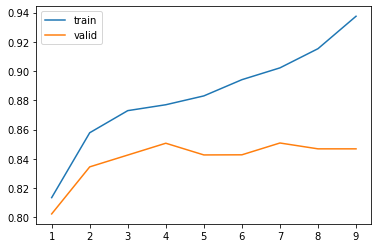

In [ ]:
max_depth = np.arange(1,10,1)
train=[]
valid=[]
a=[]
for x in max_depth:
  result = cross_validate(RandomForestClassifier(max_depth=x,
                                                 random_state=42),
                        X_train_final,
                        y_train,
                        cv=5,
                        return_train_score = True)
  train.append(result['train_score'].mean())
  valid.append(result['test_score'].mean())
  a.append(x)
sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')
plt.show

In [ ]:
a[np.argmax(valid)]

7

<function matplotlib.pyplot.show(*args, **kw)>

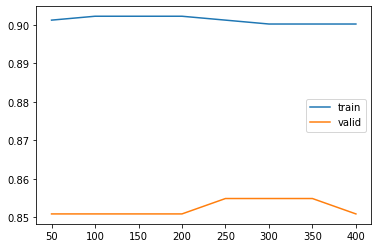

In [ ]:
n_estimators = np.arange(50,450,50)
train=[]
valid=[]
a=[]
for x in n_estimators:
  result = cross_validate(RandomForestClassifier(n_estimators=x,
                                                 max_depth=7,
                                                 random_state=42),
                        X_train_final,
                        y_train,
                        cv=5,
                        return_train_score = True)
  train.append(result['train_score'].mean())
  valid.append(result['test_score'].mean())
  a.append(x)
sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')
plt.show

In [ ]:
a[np.argmax(valid)]

250

<function matplotlib.pyplot.show(*args, **kw)>

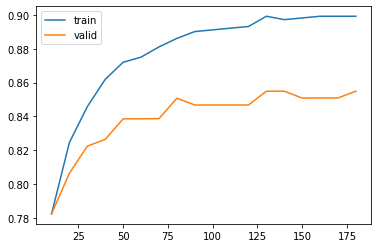

In [ ]:
max_samples = np.arange(10,190,10)
train=[]
valid=[]
a=[]
for x in max_samples:
  result = cross_validate(RandomForestClassifier(n_estimators=250,
                                                 max_samples=x,
                                                 max_depth=7,
                                                 random_state=42),
                        X_train_final,
                        y_train,
                        cv=5,
                        return_train_score = True)
  train.append(result['train_score'].mean())
  valid.append(result['test_score'].mean())
  a.append(x)
sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')
plt.show

In [ ]:
a[np.argmax(valid)]

130

<function matplotlib.pyplot.show(*args, **kw)>

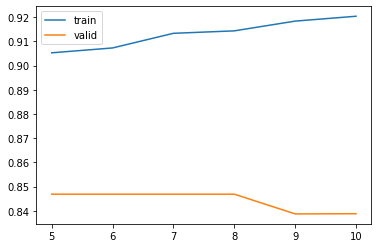

In [ ]:
max_features = np.arange(5,11,1)
train=[]
valid=[]
a=[]
for x in max_features:
  result = cross_validate(RandomForestClassifier(n_estimators=250,
                                                 max_samples=130,
                                                 max_depth=7,
                                                 max_features=x,
                                                 random_state=42),
                        X_train_final,
                        y_train,
                        cv=5,
                        return_train_score = True)
  train.append(result['train_score'].mean())
  valid.append(result['test_score'].mean())
  a.append(x)
sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')
plt.show

In [ ]:
a[np.argmax(valid)]

5

In [ ]:
# Berdasarkan hasil tunning didapatkan parameter sebagai berikut:
# n_estimators=30, max_samples=1000, max_features=20, max_depth=6, min_samples_leaf=8, max_leaf_nodes=3,random_state=42

# Mendeklarasi model dt optimal dan melakukan fitting

rf_opt = RandomForestClassifier(n_estimators=250,
                                max_samples=130,
                                max_features=5,
                                max_depth=7,
                                random_state=42)

rf_opt.fit(X_train_final, y_train)
y_train_pred_rf_opt = rf_opt.predict(X_train_final)
y_test_pred_rf_opt = rf_opt.predict(X_test_final)

In [ ]:
# TUNED RANDOM FOREST 
# Melihat hasil fitting model pada data train

print(classification_report(y_train, y_train_pred_rf_opt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.93      0.96        14
           3       0.88      1.00      0.94       194
           4       1.00      0.17      0.29        30

    accuracy                           0.90       248
   macro avg       0.97      0.77      0.80       248
weighted avg       0.91      0.90      0.86       248



In [ ]:
# Melihat hasil fitting model pada data test
print(classification_report(y_test, y_test_pred_rf_opt))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.75      0.75      0.75         4
           3       0.87      0.98      0.92        49
           4       0.00      0.00      0.00         7

    accuracy                           0.84        63
   macro avg       0.57      0.60      0.58        63
weighted avg       0.76      0.84      0.80        63



## Model Selection

In [ ]:
# Berdasarkan hasil tuning model random forest ini tidak memberikan peningkatan hasil yang signifikan,
# sehingga model defaultnya yang akan digunakan sebagai model terbaik.
# Faktor lain yang menyebabkan rendahnya nilai performa dari tiap model adalah jumlah data yang terlalu sedikit yang tidak mencapai 500 baris.

In [ ]:
# DEFULT RANDOM FOREST - BEST MODEL
# Melihat hasil fitting model pada data train

print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       0.99      1.00      1.00       194
           4       1.00      0.97      0.98        30

    accuracy                           1.00       248
   macro avg       1.00      0.99      1.00       248
weighted avg       1.00      1.00      1.00       248



In [ ]:
# Melihat hasil fitting model pada data test
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.75      0.86         4
           3       0.87      0.98      0.92        49
           4       0.00      0.00      0.00         7

    accuracy                           0.86        63
   macro avg       0.66      0.68      0.66        63
weighted avg       0.78      0.86      0.81        63



## Feature Importance

In [ ]:
# Making feature importance dataframe

feat_imp = pd.DataFrame({'feature':X_train_final.columns,'importance':rf.feature_importances_}).sort_values('importance',ascending=False)
feat_imp

,feature,importance
0,EngagementSurvey,0.279248
2,DaysLateLast30,0.186023
4,DaysWorked,0.184336
3,Absences,0.182220
1,EmpSatisfaction,0.090192
8,EmploymentStatus_Voluntarily Terminated,0.028249
9,RecruitmentSource_Google Search,0.020984
5,MaritalDesc_Divorced,0.013808
7,EmploymentStatus_Terminated for Cause,0.011240
6,CitizenDesc_US Citizen,0.003698


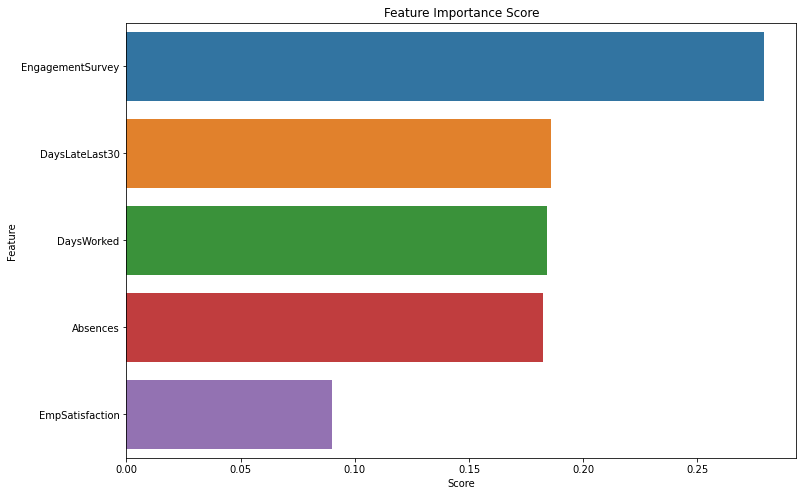

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=feat_imp.nlargest(5,columns='importance'),x='importance',y='feature')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')
plt.show()

## Confusion Matrix

Text(0, 0.5, 'True Label')

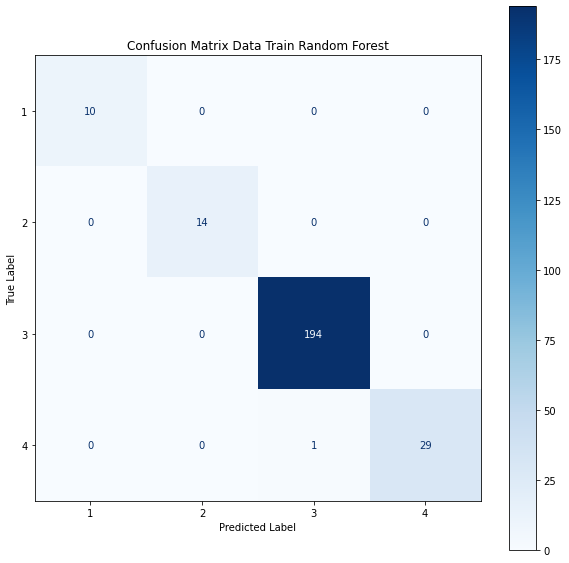

In [ ]:
# DATA TRAIN

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_train, y_train_pred_rf)
matrix = plot_confusion_matrix(rf, X_train_final, y_train, cmap=plt.cm.Blues, ax=ax)
matrix.ax_.set_title('Confusion Matrix Data Train Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Text(0, 0.5, 'True Label')

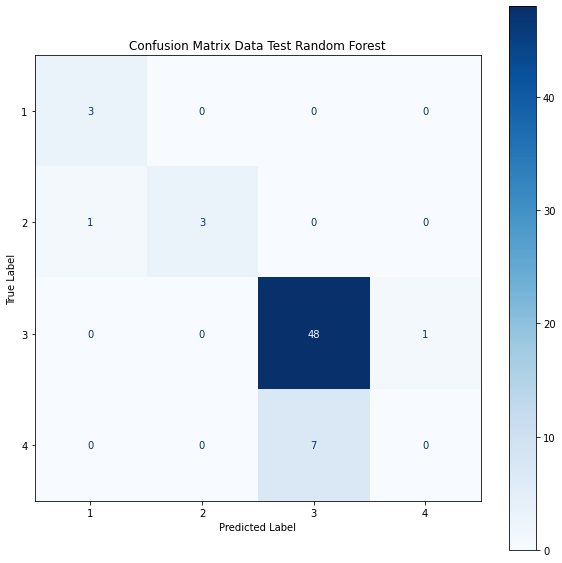

In [ ]:
# DATA TEST

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_test_pred_rf)
matrix = plot_confusion_matrix(rf, X_test_final, y_test, cmap=plt.cm.Blues, ax=ax)
matrix.ax_.set_title('Confusion Matrix Data Test Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')